In [3833]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  
import seaborn as sns
from scipy import stats
import datetime as datetime

Electricity_demands_by_region = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Electricity demand (TWh)-Table 1.csv',sep=';',decimal=',')
Electricity_generation_by_region = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Electricity generation (TWh)-Table 1.csv',sep=';',decimal=',')
Renewable_energy_buildings_consumption = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Buildings consumption (EJ)-Table 1.csv',sep=';',decimal=',')
Renewable_energy_transport_consumption = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Transport consumption (EJ)-Table 1.csv',sep=';',decimal=',')
Renewable_energy_industries_consumption = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Industry consumption (EJ)-Table 1.csv',sep=';',decimal=',')
Renewable_energy_supply = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Renewables energy supply (EJ)-Table 1.csv',sep=';',decimal=',')
Renewable_energy_generation = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Renewables generation (TWh)-Table 1.csv',sep=';',decimal=',')
Solar_energy_generation = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Solar PV generation (TWh)-Table 1.csv',sep=';',decimal=',')
Wind_energy_generation = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Wind generation (TWh)-Table 1.csv',sep=';',decimal=',')
Total_CO2_emissions = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Total CO2 emissions (Mt CO2)-Table 1.csv',sep=';',decimal=',')
Total_energy_supply = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Total energy supply (EJ)-Table 1.csv',sep=';',decimal=',')
Total_energy_consumption = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Total final consumption (EJ)-Table 1.csv',sep=';',decimal=',')
Global_gdp = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_76261.csv',sep=';',decimal=',')
Global_population = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv',sep=';',decimal=',')


In [3834]:
Electricity_demands_by_region.head(20)

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Unnamed: 8,Unnamed: 9,...,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,WORLD,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity demand (TWh),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back to contents page,...,Stated Policies Scenario,Stated Policies Scenario,NaN,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,NaN,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Electricity demand (TWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,NaN,Announced\nPledges,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,NaN,2030,2035,2050,NaN,2030,2035,2050
8,GEC2024,1,Energy,Electricity,Final demand,TWh,World,2.0,NaN,World,...,25 502,26 172,NaN,32 929,37 371,49 694,NaN,33 772,40 450,60 258
9,GEC2024,1,Energy,Electricity,Final demand,TWh,North America,2.0,NaN,North America,...,4 958,4 890,NaN,5 444,6 115,7 840,NaN,5 597,6 673,9 815


In [3835]:
Electricity_demands_by_region.info

<bound method DataFrame.info of    Publication Scenario Category      Product          Flow Unit  \
0          NaN      NaN      NaN          NaN           NaN  NaN   
1        WORLD    World      NaN          NaN           NaN  NaN   
2          NaN      NaN      NaN          NaN           NaN  NaN   
3          NaN      NaN      NaN          NaN           NaN  NaN   
4          NaN      NaN      NaN          NaN           NaN  NaN   
5          NaN      NaN      NaN          NaN           NaN  NaN   
6          NaN      NaN      NaN          NaN           NaN  NaN   
7          NaN      NaN      NaN          NaN           NaN  NaN   
8      GEC2024        1   Energy  Electricity  Final demand  TWh   
9      GEC2024        1   Energy  Electricity  Final demand  TWh   
10     GEC2024        1   Energy  Electricity  Final demand  TWh   
11     GEC2024        1   Energy  Electricity  Final demand  TWh   
12     GEC2024        1   Energy  Electricity  Final demand  TWh   
13     GEC2024  

In [3836]:
Electricity_demands_by_region = Electricity_demands_by_region.dropna(how="all")  # Drops rows where all values are NaN
Electricity_demands_by_region = Electricity_demands_by_region.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Electricity_demands_by_region = Electricity_demands_by_region.drop(columns=["Unnamed: 8", "Unnamed: 9", "Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Electricity_demands_by_region.fillna(0, inplace=True)
Electricity_demands_by_region.info

<bound method DataFrame.info of    Publication Scenario Category      Product          Flow Unit  \
0            0        0        0            0             0    0   
1        WORLD    World        0            0             0    0   
2            0        0        0            0             0    0   
4            0        0        0            0             0    0   
5            0        0        0            0             0    0   
7            0        0        0            0             0    0   
8      GEC2024        1   Energy  Electricity  Final demand  TWh   
9      GEC2024        1   Energy  Electricity  Final demand  TWh   
10     GEC2024        1   Energy  Electricity  Final demand  TWh   
11     GEC2024        1   Energy  Electricity  Final demand  TWh   
12     GEC2024        1   Energy  Electricity  Final demand  TWh   
13     GEC2024        1   Energy  Electricity  Final demand  TWh   
14     GEC2024        1   Energy  Electricity  Final demand  TWh   
15     GEC2024  

In [3837]:
# Drop all columns that contain "NO." in their column names
Electricity_demands_by_region = Electricity_demands_by_region.loc[:, ~Electricity_demands_by_region.columns.str.contains("NO\\.", case=False, regex=True)]
Electricity_demands_by_region

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,0,0,0,0,0.0,2010,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,WORLD,World,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0
2,0,0,0,0,0,0,0,0.0,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,0.0,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,0.0,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
4,0,0,0,0,0,0,0,0.0,0,0,Electricity demand (TWh),0.0,0,0,0,0.0,0,0,0
5,0,0,0,0,0,0,0,0.0,0,0,0,0.0,Stated\nPolicies,0,0,0.0,Announced\nPledges,0,0
7,0,0,0,0,0,0,0,0.0,2010,2022,2023,0.0,2030,2035,2050,0.0,2030,2035,2050
8,GEC2024,1,Energy,Electricity,Final demand,TWh,World,2.0,18 503,25 502,26 172,0.0,32 929,37 371,49 694,0.0,33 772,40 450,60 258
9,GEC2024,1,Energy,Electricity,Final demand,TWh,North America,2.0,4 632,4 958,4 890,0.0,5 444,6 115,7 840,0.0,5 597,6 673,9 815
10,GEC2024,1,Energy,Electricity,Final demand,TWh,United States,2.0,3 880,4 117,4 044,0.0,4 485,5 037,6 448,0.0,4 610,5 489,8 077
11,GEC2024,1,Energy,Electricity,Final demand,TWh,Central and South America,2.0,932,1 138,1 182,0.0,1 418,1 650,2 495,0.0,1 534,1 908,3 468


In [3838]:
# Drop multiple rows by index
Electricity_demands_by_region = Electricity_demands_by_region.drop(index=[1, 2,])  


# Reset index after dropping the row (optional)
Electricity_demands_by_region = Electricity_demands_by_region.reset_index(drop=True)
Electricity_demands_by_region.tail()

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
15,GEC2024,1,Energy,Electricity,Final demand,TWh,Asia Pacific,2.0,7 132,12 897,13 645,0.0,18 171,20 549,26 883,0.0,18 268,21 415,30 830
16,GEC2024,1,Energy,Electricity,Final demand,TWh,China,2.0,3 659,8 010,8 601,0.0,11 626,12 863,15 627,0.0,11 652,13 260,16 477
17,GEC2024,1,Energy,Electricity,Final demand,TWh,India,2.0,715,1 391,1 510,0.0,2 300,2 833,4 539,0.0,2 191,2 797,5 384
18,GEC2024,1,Energy,Electricity,Final demand,TWh,Japan,2.0,1 071,922,934,0.0,951,971,1 036,0.0,972,1 042,1 226
19,GEC2024,1,Energy,Electricity,Final demand,TWh,Southeast Asia,2.0,607,1 156,1 204,0.0,1 644,2 011,3 106,0.0,1 705,2 180,4 255


In [3839]:
# Drop the specified columns
Electricity_demands_by_region = Electricity_demands_by_region.drop(columns=["Publication", "Scenario", "Category", "Product", "Year", "Unnamed: 13", "Unnamed: 17"])

# Display the updated DataFrame
Electricity_demands_by_region.head(20)


,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,0,0,0,0,0,Electricity demand (TWh),0,0,0,0,0,0
2,0,0,0,0,0,0,Stated\nPolicies,0,0,Announced\nPledges,0,0
3,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
4,Final demand,TWh,World,18 503,25 502,26 172,32 929,37 371,49 694,33 772,40 450,60 258
5,Final demand,TWh,North America,4 632,4 958,4 890,5 444,6 115,7 840,5 597,6 673,9 815
6,Final demand,TWh,United States,3 880,4 117,4 044,4 485,5 037,6 448,4 610,5 489,8 077
7,Final demand,TWh,Central and South America,932,1 138,1 182,1 418,1 650,2 495,1 534,1 908,3 468
8,Final demand,TWh,Brazil,451,574,602,693,771,1 080,720,852,1 364
9,Final demand,TWh,Europe,3 563,3 498,3 394,4 112,4 691,5 979,4 363,5 217,6 876


In [3840]:
# Drop multiple rows by index
Electricity_demands_by_region = Electricity_demands_by_region.drop(index=[0, 1, 2,])  


# Reset index after dropping the row 
Electricity_demands_by_region_cleaned = Electricity_demands_by_region.reset_index(drop=True)
Electricity_demands_by_region_cleaned.head(20)

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Final demand,TWh,World,18 503,25 502,26 172,32 929,37 371,49 694,33 772,40 450,60 258
2,Final demand,TWh,North America,4 632,4 958,4 890,5 444,6 115,7 840,5 597,6 673,9 815
3,Final demand,TWh,United States,3 880,4 117,4 044,4 485,5 037,6 448,4 610,5 489,8 077
4,Final demand,TWh,Central and South America,932,1 138,1 182,1 418,1 650,2 495,1 534,1 908,3 468
5,Final demand,TWh,Brazil,451,574,602,693,771,1 080,720,852,1 364
6,Final demand,TWh,Europe,3 563,3 498,3 394,4 112,4 691,5 979,4 363,5 217,6 876
7,Final demand,TWh,European Union,2 571,2 474,2 381,2 875,3 289,4 195,3 077,3 682,4 716
8,Final demand,TWh,Africa,570,721,729,979,1 198,2 088,1 146,1 550,3 372
9,Final demand,TWh,Middle East,690,1 102,1 126,1 465,1 733,2 722,1 525,2 242,4 080


In [3841]:
Electricity_generation_by_region.head(20)

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Unnamed: 8,Unnamed: 9,...,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,WORLD,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity generation (TWh),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back to contents page,...,Stated Policies Scenario,Stated Policies Scenario,NaN,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,NaN,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Electricity generation (TWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,NaN,Announced\nPledges,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,NaN,2030,2035,2050,NaN,2030,2035,2050
8,GEC2024,1,Energy,Total,Electricity generation,TWh,World,2.0,NaN,World,...,29 145,29 863,NaN,37 489,42 766,58 352,NaN,38 285,45 759,70 564
9,GEC2024,1,Energy,Total,Electricity generation,TWh,North America,2.0,NaN,North America,...,5 468,5 390,NaN,5 979,6 704,8 955,NaN,6 137,7 403,11 361


In [3842]:
Electricity_generation_by_region = Electricity_generation_by_region.dropna(how="all")  # Drops rows where all values are NaN
Electricity_generation_by_region = Electricity_generation_by_region.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Electricity_generation_by_region = Electricity_generation_by_region.drop(columns=["Unnamed: 8", "Unnamed: 9", "Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Electricity_demands_by_region.fillna(0, inplace=True)
Electricity_generation_by_region.info

<bound method DataFrame.info of    Publication Scenario Category Product                    Flow Unit  \
0          NaN      NaN      NaN     NaN                     NaN  NaN   
1        WORLD    World      NaN     NaN                     NaN  NaN   
2          NaN      NaN      NaN     NaN                     NaN  NaN   
4          NaN      NaN      NaN     NaN                     NaN  NaN   
5          NaN      NaN      NaN     NaN                     NaN  NaN   
7          NaN      NaN      NaN     NaN                     NaN  NaN   
8      GEC2024        1   Energy   Total  Electricity generation  TWh   
9      GEC2024        1   Energy   Total  Electricity generation  TWh   
10     GEC2024        1   Energy   Total  Electricity generation  TWh   
11     GEC2024        1   Energy   Total  Electricity generation  TWh   
12     GEC2024        1   Energy   Total  Electricity generation  TWh   
13     GEC2024        1   Energy   Total  Electricity generation  TWh   
14     GEC2024     

In [3843]:
# Drop all columns that contain "NO." in their column names
Electricity_generation_by_region = Electricity_generation_by_region.loc[:, ~Electricity_generation_by_region.columns.str.contains("NO\\.", case=False, regex=True)]
Electricity_generation_by_region

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,WORLD,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,NaN,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,NaN,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity generation (TWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,NaN,Announced\nPledges,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2022,2023,NaN,2030,2035,2050,NaN,2030,2035,2050
8,GEC2024,1,Energy,Total,Electricity generation,TWh,World,2.0,21 511,29 145,29 863,NaN,37 489,42 766,58 352,NaN,38 285,45 759,70 564
9,GEC2024,1,Energy,Total,Electricity generation,TWh,North America,2.0,5 230,5 468,5 390,NaN,5 979,6 704,8 955,NaN,6 137,7 403,11 361
10,GEC2024,1,Energy,Total,Electricity generation,TWh,United States,2.0,4 354,4 473,4 412,NaN,4 854,5 446,7 365,NaN,4 994,6 046,9 384
11,GEC2024,1,Energy,Total,Electricity generation,TWh,Central and South America,2.0,1 129,1 372,1 419,NaN,1 691,1 951,2 921,NaN,1 805,2 228,4 003


In [3844]:
# Drop multiple rows by index
Electricity_generation_by_region = Electricity_generation_by_region.drop(index=[1,2])  


# Reset index after dropping the row (optional)
Electricity_generation_by_region = Electricity_generation_by_region.reset_index(drop=True)
Electricity_generation_by_region.head()

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity generation (TWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,NaN,Announced\nPledges,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2022,2023,NaN,2030,2035,2050,NaN,2030,2035,2050
4,GEC2024,1,Energy,Total,Electricity generation,TWh,World,2.0,21 511,29 145,29 863,NaN,37 489,42 766,58 352,NaN,38 285,45 759,70 564


In [3845]:
# Drop the specified columns
Electricity_generation_by_region = Electricity_generation_by_region.drop(columns=["Publication", "Scenario", "Category", "Product", "Year", "Unnamed: 13", "Unnamed: 17"])

# Display the updated DataFrame
Electricity_generation_by_region.head(20)


,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,NaN,NaN,NaN,NaN,NaN,Electricity generation (TWh),NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,Announced\nPledges,NaN,NaN
3,NaN,NaN,NaN,2010,2022,2023,2030,2035,2050,2030,2035,2050
4,Electricity generation,TWh,World,21 511,29 145,29 863,37 489,42 766,58 352,38 285,45 759,70 564
5,Electricity generation,TWh,North America,5 230,5 468,5 390,5 979,6 704,8 955,6 137,7 403,11 361
6,Electricity generation,TWh,United States,4 354,4 473,4 412,4 854,5 446,7 365,4 994,6 046,9 384
7,Electricity generation,TWh,Central and South America,1 129,1 372,1 419,1 691,1 951,2 921,1 805,2 228,4 003
8,Electricity generation,TWh,Brazil,516,677,710,809,900,1 260,835,985,1 573
9,Electricity generation,TWh,Europe,4 119,3 980,3 885,4 719,5 508,6 893,5 027,6 059,8 174


In [3846]:
# Drop multiple rows by index
Electricity_generation_by_region = Electricity_generation_by_region.drop(index=[1,2,3])  


# Reset index after dropping the row (optional)
Electricity_generation_by_region_cleaned = Electricity_generation_by_region.reset_index(drop=True)
Electricity_generation_by_region_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Electricity generation,TWh,World,21 511,29 145,29 863,37 489,42 766,58 352,38 285,45 759,70 564
2,Electricity generation,TWh,North America,5 230,5 468,5 390,5 979,6 704,8 955,6 137,7 403,11 361
3,Electricity generation,TWh,United States,4 354,4 473,4 412,4 854,5 446,7 365,4 994,6 046,9 384
4,Electricity generation,TWh,Central and South America,1 129,1 372,1 419,1 691,1 951,2 921,1 805,2 228,4 003


In [3847]:
Renewable_energy_buildings_consumption.head(20) 

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Unnamed: 8,Unnamed: 9,...,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,WORLD,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buildings consumption (EJ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back to contents page,...,Stated Policies Scenario,Stated Policies Scenario,NaN,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,NaN,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Buildings consumption (EJ),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,NaN,Announced\nPledges,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,NaN,2030,2035,2050,NaN,2030,2035,2050
8,GEC2024,1,Energy,Total,Buildings,EJ,World,2.0,NaN,World,...,"125,0","124,1",NaN,"132,5","136,7","152,6",NaN,"120,0","117,2","122,9"
9,GEC2024,1,Energy,Total,Buildings,EJ,North America,2.0,NaN,North America,...,"24,9","23,9",NaN,"23,4","22,8","22,3",NaN,"22,0","19,8","16,2"


In [3848]:
Renewable_energy_buildings_consumption = Renewable_energy_buildings_consumption.dropna(how="all")  # Drops rows where all values are NaN
Renewable_energy_buildings_consumption = Renewable_energy_buildings_consumption.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Renewable_energy_buildings_consumption = Renewable_energy_buildings_consumption.drop(columns=["Unnamed: 8", "Unnamed: 9","Unnamed: 13", "Unnamed: 17","Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Renewable_energy_buildings_consumption.fillna(0, inplace=True)
Renewable_energy_buildings_consumption.info

<bound method DataFrame.info of    Publication Scenario Category Product       Flow Unit  \
0            0        0        0       0          0    0   
1        WORLD    World        0       0          0    0   
2            0        0        0       0          0    0   
4            0        0        0       0          0    0   
5            0        0        0       0          0    0   
7            0        0        0       0          0    0   
8      GEC2024        1   Energy   Total  Buildings   EJ   
9      GEC2024        1   Energy   Total  Buildings   EJ   
10     GEC2024        1   Energy   Total  Buildings   EJ   
11     GEC2024        1   Energy   Total  Buildings   EJ   
12     GEC2024        1   Energy   Total  Buildings   EJ   
13     GEC2024        1   Energy   Total  Buildings   EJ   
14     GEC2024        1   Energy   Total  Buildings   EJ   
15     GEC2024        1   Energy   Total  Buildings   EJ   
16     GEC2024        1   Energy   Total  Buildings   EJ   
17     G

In [3849]:
# Drop all columns that contain "NO." in their column names
Renewable_energy_buildings_consumption = Renewable_energy_buildings_consumption.loc[:, ~Renewable_energy_buildings_consumption.columns.str.contains("NO\\.", case=False, regex=True)]
Renewable_energy_buildings_consumption# Drop all columns that contain "NO." in their column names
Renewable_energy_buildings_consumption = Renewable_energy_buildings_consumption.loc[:, ~Renewable_energy_buildings_consumption.columns.str.contains("NO\\.", case=False, regex=True)]
Renewable_energy_buildings_consumption

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,0,0,0,0,0.0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,WORLD,World,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0.0,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
4,0,0,0,0,0,0,0,0.0,0,0,Buildings consumption (EJ),0,0,0,0,0,0
5,0,0,0,0,0,0,0,0.0,0,0,0,Stated\nPolicies,0,0,Announced\nPledges,0,0
7,0,0,0,0,0,0,0,0.0,2010,2022,2023,2030,2035,2050,2030,2035,2050
8,GEC2024,1,Energy,Total,Buildings,EJ,World,2.0,"111,2","125,0","124,1","132,5","136,7","152,6","120,0","117,2","122,9"
9,GEC2024,1,Energy,Total,Buildings,EJ,North America,2.0,"23,7","24,9","23,9","23,4","22,8","22,3","22,0","19,8","16,2"
10,GEC2024,1,Energy,Total,Buildings,EJ,United States,2.0,"20,5","21,4","20,4","19,9","19,3","18,4","18,8","16,8","13,3"
11,GEC2024,1,Energy,Total,Buildings,EJ,Central and South America,2.0,"4,4","5,1","5,1","5,5","5,8","6,8","5,0","5,1","5,9"


In [3850]:
# Drop multiple rows by index
Renewable_energy_buildings_consumption = Renewable_energy_buildings_consumption.drop(index=[1,2,]) 


# Reset index after dropping the row (optional)
Renewable_energy_buildings_consumption = Renewable_energy_buildings_consumption.reset_index(drop=True)
Renewable_energy_buildings_consumption.head()

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,0,0,0,0,0.0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,0,0,0,0,0,0,0,0.0,0,0,Buildings consumption (EJ),0,0,0,0,0,0
2,0,0,0,0,0,0,0,0.0,0,0,0,Stated\nPolicies,0,0,Announced\nPledges,0,0
3,0,0,0,0,0,0,0,0.0,2010,2022,2023,2030,2035,2050,2030,2035,2050
4,GEC2024,1,Energy,Total,Buildings,EJ,World,2.0,"111,2","125,0","124,1","132,5","136,7","152,6","120,0","117,2","122,9"


In [3851]:
# Drop the specified columns
Renewable_energy_buildings_consumption = Renewable_energy_buildings_consumption.drop(columns=["Publication", "Scenario", "Category", "Product", "Year"])

# Display the updated DataFrame
Renewable_energy_buildings_consumption.head(20)


,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,0,0,0,0,0,Buildings consumption (EJ),0,0,0,0,0,0
2,0,0,0,0,0,0,Stated\nPolicies,0,0,Announced\nPledges,0,0
3,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
4,Buildings,EJ,World,"111,2","125,0","124,1","132,5","136,7","152,6","120,0","117,2","122,9"
5,Buildings,EJ,North America,"23,7","24,9","23,9","23,4","22,8","22,3","22,0","19,8","16,2"
6,Buildings,EJ,United States,"20,5","21,4","20,4","19,9","19,3","18,4","18,8","16,8","13,3"
7,Buildings,EJ,Central and South America,"4,4","5,1","5,1","5,5","5,8","6,8","5,0","5,1","5,9"
8,Buildings,EJ,Brazil,"1,4","1,8","1,9","1,9","2,1","2,7","1,9","2,0","2,5"
9,Buildings,EJ,Europe,"24,3","20,7","19,9","20,7","20,0","18,9","19,6","17,7","14,6"


In [3852]:
import pandas as pd

# Sample data 
data = {
    'Unit': ['EJ', 'EJ', 'EJ'],
    'Region': ['World', 'North America', 'Europe'],
    'SPS 2010': [111.2, 23.7, 24.3],
    'SPS 2022': [125.0, 24.9, 20.7],
    'SPS 2023': [124.1, 23.9, 19.9],
    'SPS 2030': [132.5, 23.4, 20.7],
    'SPS 2035': [136.7, 22.8, 20.0],
    'SPS 2050': [152.6, 22.3, 18.9],
    'APS 2030': [120.0, 22.0, 19.6],
    'APS 2035': [117.2, 19.8, 17.7],
    'APS 2050': [122.9, 16.2, 14.6]
}

# Create DataFrame
Renewable_energy_buildings_consumption = pd.DataFrame(data)

# Conversion factor from EJ to TWh
EJ_to_TWh = 277.77777777778  # 1 EJ = 277.77777777778 TWh

# Apply conversion to all relevant columns
columns_to_convert = ['SPS 2010', 'SPS 2022', 'SPS 2023', 'SPS 2030', 'SPS 2035', 'SPS 2050', 'APS 2030', 'APS 2035', 'APS 2050']
Renewable_energy_buildings_consumption[columns_to_convert] = Renewable_energy_buildings_consumption[columns_to_convert].apply(lambda x: x * EJ_to_TWh)

# Update the 'Unit' column to reflect the new unit
Renewable_energy_buildings_consumption['Unit'] = 'TWh'

# Display the updated DataFrame
print(Renewable_energy_buildings_consumption)


  Unit         Region      SPS 2010      SPS 2022      SPS 2023      SPS 2030  \
0  TWh          World  30888.888889  34722.222222  34472.222222  36805.555556   
1  TWh  North America   6583.333333   6916.666667   6638.888889   6500.000000   
2  TWh         Europe   6750.000000   5750.000000   5527.777778   5750.000000   

       SPS 2035      SPS 2050      APS 2030      APS 2035      APS 2050  
0  37972.222222  42388.888889  33333.333333  32555.555556  34138.888889  
1   6333.333333   6194.444444   6111.111111   5500.000000   4500.000000  
2   5555.555556   5250.000000   5444.444444   4916.666667   4055.555556  


In [3853]:
# Drop multiple rows by index
Renewable_energy_buildings_consumption = Renewable_energy_buildings_consumption.drop(index=[1,2])  


# Reset index after dropping the row (optional)
Renewable_energy_buildings_consumption_cleaned = Renewable_energy_buildings_consumption.reset_index(drop=True)
Renewable_energy_buildings_consumption_cleaned.head()

,Unit,Region,SPS 2010,SPS 2022,SPS 2023,SPS 2030,SPS 2035,SPS 2050,APS 2030,APS 2035,APS 2050
0,TWh,World,30888.888889,34722.222222,34472.222222,36805.555556,37972.222222,42388.888889,33333.333333,32555.555556,34138.888889


In [3854]:
Renewable_energy_transport_consumption.head(20)

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Unnamed: 8,Unnamed: 9,...,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,WORLD,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transport consumption (EJ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back to contents page,...,Stated Policies Scenario,Stated Policies Scenario,NaN,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,NaN,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Transport consumption (EJ),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,NaN,Announced\nPledges,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,NaN,2030,2035,2050,NaN,2030,2035,2050
8,GEC2024,1,Energy,Total,Transport,EJ,World,2.0,NaN,World,...,"117,7","122,0",NaN,"131,7","132,6","139,9",NaN,"125,2","120,8","109,1"
9,GEC2024,1,Energy,Total,Transport,EJ,North America,2.0,NaN,North America,...,"30,3","30,6",NaN,"29,3","25,9","21,3",NaN,"27,6","23,1","16,4"


In [3855]:
Renewable_energy_transport_consumption = Renewable_energy_transport_consumption.dropna(how="all")  # Drops rows where all values are NaN
Renewable_energy_transport_consumption = Renewable_energy_transport_consumption.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Renewable_energy_transport_consumption = Renewable_energy_transport_consumption.drop(columns=["Unnamed: 8", "Unnamed: 9","Unnamed: 13", "Unnamed: 17","Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Renewable_energy_transport_consumption.fillna(0, inplace=True)
Renewable_energy_transport_consumption.info

<bound method DataFrame.info of    Publication Scenario Category Product       Flow Unit  \
0            0        0        0       0          0    0   
1        WORLD    World        0       0          0    0   
2            0        0        0       0          0    0   
4            0        0        0       0          0    0   
5            0        0        0       0          0    0   
7            0        0        0       0          0    0   
8      GEC2024        1   Energy   Total  Transport   EJ   
9      GEC2024        1   Energy   Total  Transport   EJ   
10     GEC2024        1   Energy   Total  Transport   EJ   
11     GEC2024        1   Energy   Total  Transport   EJ   
12     GEC2024        1   Energy   Total  Transport   EJ   
13     GEC2024        1   Energy   Total  Transport   EJ   
14     GEC2024        1   Energy   Total  Transport   EJ   
15     GEC2024        1   Energy   Total  Transport   EJ   
16     GEC2024        1   Energy   Total  Transport   EJ   
17     G

In [3856]:
# Drop all columns that contain "NO." in their column names
Renewable_energy_transport_consumption = Renewable_energy_transport_consumption.loc[:, ~Renewable_energy_transport_consumption.columns.str.contains("NO\\.", case=False, regex=True)]
Renewable_energy_transport_consumption# Drop all columns that contain "NO." in their column names
Renewable_energy_transport_consumption = Renewable_energy_transport_consumption.loc[:, ~Renewable_energy_transport_consumption.columns.str.contains("NO\\.", case=False, regex=True)]
Renewable_energy_transport_consumption

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,0,0,0,0,0.0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,WORLD,World,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0.0,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
4,0,0,0,0,0,0,0,0.0,0,0,Transport consumption (EJ),0,0,0,0,0,0
5,0,0,0,0,0,0,0,0.0,0,0,0,Stated\nPolicies,0,0,Announced\nPledges,0,0
7,0,0,0,0,0,0,0,0.0,2010,2022,2023,2030,2035,2050,2030,2035,2050
8,GEC2024,1,Energy,Total,Transport,EJ,World,2.0,"101,1","117,7","122,0","131,7","132,6","139,9","125,2","120,8","109,1"
9,GEC2024,1,Energy,Total,Transport,EJ,North America,2.0,"29,6","30,3","30,6","29,3","25,9","21,3","27,6","23,1","16,4"
10,GEC2024,1,Energy,Total,Transport,EJ,United States,2.0,"25,0","25,9","26,3","25,2","22,2","17,8","23,8","19,8","13,9"
11,GEC2024,1,Energy,Total,Transport,EJ,Central and South America,2.0,"6,1","7,6","7,7","8,8","9,6","12,0","8,5","8,7","8,0"


In [3857]:
# Drop multiple rows by index
Renewable_energy_transport_consumption = Renewable_energy_transport_consumption.drop(index=[1,2,])  


# Reset index after dropping the row (optional)
Renewable_energy_transport_consumption = Renewable_energy_transport_consumption.reset_index(drop=True)
Renewable_energy_transport_consumption.head()

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,0,0,0,0,0.0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,0,0,0,0,0,0,0,0.0,0,0,Transport consumption (EJ),0,0,0,0,0,0
2,0,0,0,0,0,0,0,0.0,0,0,0,Stated\nPolicies,0,0,Announced\nPledges,0,0
3,0,0,0,0,0,0,0,0.0,2010,2022,2023,2030,2035,2050,2030,2035,2050
4,GEC2024,1,Energy,Total,Transport,EJ,World,2.0,"101,1","117,7","122,0","131,7","132,6","139,9","125,2","120,8","109,1"


In [3858]:
# Drop the specified columns
Renewable_energy_transport_consumption = Renewable_energy_transport_consumption.drop(columns=["Publication", "Scenario", "Category", "Product", "Year"])

# Display the updated DataFrame
Renewable_energy_transport_consumption.head(20)


,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,0,0,0,0,0,Transport consumption (EJ),0,0,0,0,0,0
2,0,0,0,0,0,0,Stated\nPolicies,0,0,Announced\nPledges,0,0
3,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
4,Transport,EJ,World,"101,1","117,7","122,0","131,7","132,6","139,9","125,2","120,8","109,1"
5,Transport,EJ,North America,"29,6","30,3","30,6","29,3","25,9","21,3","27,6","23,1","16,4"
6,Transport,EJ,United States,"25,0","25,9","26,3","25,2","22,2","17,8","23,8","19,8","13,9"
7,Transport,EJ,Central and South America,"6,1","7,6","7,7","8,8","9,6","12,0","8,5","8,7","8,0"
8,Transport,EJ,Brazil,"2,9","3,8","3,9","4,3","4,6","5,4","4,2","4,3","4,0"
9,Transport,EJ,Europe,"15,2","16,0","15,9","14,9","13,3","9,6","14,3","12,1","7,9"


In [3859]:
# Drop multiple rows by index
Renewable_energy_transport_consumption = Renewable_energy_transport_consumption.drop(index=[1,2,3])  


# Reset index after dropping the row (optional)
Renewable_energy_transport_consumption_cleaned = Renewable_energy_transport_consumption.reset_index(drop=True)
Renewable_energy_transport_consumption_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Transport,EJ,World,"101,1","117,7","122,0","131,7","132,6","139,9","125,2","120,8","109,1"
2,Transport,EJ,North America,"29,6","30,3","30,6","29,3","25,9","21,3","27,6","23,1","16,4"
3,Transport,EJ,United States,"25,0","25,9","26,3","25,2","22,2","17,8","23,8","19,8","13,9"
4,Transport,EJ,Central and South America,"6,1","7,6","7,7","8,8","9,6","12,0","8,5","8,7","8,0"


In [3860]:
#Renewable_energy_industries_consumption.head(20)
Renewable_energy_industries_consumption = Renewable_energy_industries_consumption.dropna(how="all")  # Drops rows where all values are NaN
Renewable_energy_industries_consumption = Renewable_energy_industries_consumption.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Renewable_energy_industries_consumption = Renewable_energy_industries_consumption.drop(columns=["Unnamed: 8", "Unnamed: 9","Unnamed: 13", "Unnamed: 17","Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Renewable_energy_industries_consumption.fillna(0, inplace=True)
#Renewable_energy_industries_consumption.info
# Drop all columns that contain "NO." in their column names
Renewable_energy_industries_consumption = Renewable_energy_industries_consumption.loc[:, ~Renewable_energy_industries_consumption.columns.str.contains("NO\\.", case=False, regex=True)]
Renewable_energy_industries_consumption# Drop all columns that contain "NO." in their column names
Renewable_energy_industries_consumption = Renewable_energy_industries_consumption.loc[:, ~Renewable_energy_industries_consumption.columns.str.contains("NO\\.", case=False, regex=True)]
#Renewable_energy_industries_consumption
# Drop multiple rows by index
Renewable_energy_industries_consumption = Renewable_energy_industries_consumption.drop(index=[1,2,]) 


# Reset index after dropping the row (optional)
Renewable_energy_industries_consumption = Renewable_energy_industries_consumption.reset_index(drop=True)
#Renewable_energy_industries_consumption.head()
# Drop the specified columns
Renewable_energy_industries_consumption = Renewable_energy_industries_consumption.drop(columns=["Publication", "Scenario", "Category", "Product", "Year"])

# Display the updated DataFrame
#Renewable_energy_industries_consumption.head(20)
# Drop multiple rows by index
Renewable_energy_industries_consumption = Renewable_energy_industries_consumption.drop(index=[1,2,3])  


# Reset index after dropping the row
Renewable_energy_industries_consumption_cleaned = Renewable_energy_industries_consumption.reset_index(drop=True)
Renewable_energy_industries_consumption_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Industry,EJ,World,"143,2","169,7","172,8","193,1","199,7","209,5","185,2","184,6","176,9"
2,Industry,EJ,North America,"17,8","19,2","19,0","20,4","20,9","22,2","19,7","19,7","18,8"
3,Industry,EJ,United States,"14,1","15,3","15,1","16,0","16,3","17,2","15,5","15,4","14,4"
4,Industry,EJ,Central and South America,"7,2","7,1","7,1","7,8","8,3","9,7","7,7","8,0","9,0"


In [3861]:
Renewable_energy_supply = Renewable_energy_supply.dropna(how="all")  # Drops rows where all values are NaN
Renewable_energy_supply = Renewable_energy_supply.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Renewable_energy_supply = Renewable_energy_supply.drop(columns=["Unnamed: 8", "Unnamed: 9","Unnamed: 13", "Unnamed: 17","Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Renewable_energy_supply.fillna(0, inplace=True)

# Drop all columns that contain "NO." in their column names
Renewable_energy_supply = Renewable_energy_supply.loc[:, ~Renewable_energy_supply.columns.str.contains("NO\\.", case=False, regex=True)]
Renewable_energy_supply# Drop all columns that contain "NO." in their column names
Renewable_energy_supply = Renewable_energy_supply.loc[:, ~Renewable_energy_supply.columns.str.contains("NO\\.", case=False, regex=True)]

# Drop multiple rows by index
Renewable_energy_supply = Renewable_energy_supply.drop(index=[1,2,])  


# Reset index after dropping the row 
Renewable_energy_supply = Renewable_energy_supply.reset_index(drop=True)

# Drop the specified columns
Renewable_energy_supply = Renewable_energy_supply.drop(columns=["Publication", "Scenario", "Category", "Product", "Year"])

# Drop multiple rows by index
Renewable_energy_supply = Renewable_energy_supply.drop(index=[1,2,3])  


# Reset index after dropping the row
Renewable_energy_supply_cleaned = Renewable_energy_supply.reset_index(drop=True)
Renewable_energy_supply_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Total energy supply,EJ,World,"43,2","74,4","77,9","120,1","152,9","240,6","139,5","196,5","336,3"
2,Total energy supply,EJ,North America,"8,8","12,7","12,6","17,9","22,1","33,3","24,2","34,6","51,9"
3,Total energy supply,EJ,United States,"6,6","10,0","10,1","14,4","18,2","28,1","19,9","29,4","43,8"
4,Total energy supply,EJ,Central and South America,"7,7","9,9","10,3","12,7","14,4","21,6","14,5","18,2","29,2"


In [3862]:
Renewable_energy_generation = Renewable_energy_generation.dropna(how="all")  # Drops rows where all values are NaN
Renewable_energy_generation = Renewable_energy_generation.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Renewable_energy_generation = Renewable_energy_generation.drop(columns=["Unnamed: 8", "Unnamed: 9","Unnamed: 13", "Unnamed: 17","Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Renewable_energy_generation.fillna(0, inplace=True)

# Drop all columns that contain "NO." in their column names
Renewable_energy_generation = Renewable_energy_generation.loc[:, ~Renewable_energy_generation.columns.str.contains("NO\\.", case=False, regex=True)]
Renewable_energy_generation# Drop all columns that contain "NO." in their column names
Renewable_energy_generation = Renewable_energy_generation.loc[:, ~Renewable_energy_generation.columns.str.contains("NO\\.", case=False, regex=True)]

# Drop multiple rows by index
Renewable_energy_generation = Renewable_energy_generation.drop(index=[1,2,])  


# Reset index after dropping the row (optional)
Renewable_energy_generation = Renewable_energy_generation.reset_index(drop=True)

# Drop the specified columns
Renewable_energy_generation = Renewable_energy_generation.drop(columns=["Publication", "Scenario", "Category", "Product", "Year"])

# Drop multiple rows by index
Renewable_energy_generation = Renewable_energy_generation.drop(index=[1,2,3]) 


# Reset index after dropping the row (optional)
Renewable_energy_generation_cleaned = Renewable_energy_generation.reset_index(drop=True)
Renewable_energy_generation_cleaned.head()

/opt/anaconda3/envs/jaamann/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Electricity generation,TWh,World,4 209,8 567,9 029,17 577,24 930,42 770,19 897,30 828,58 611
2,Electricity generation,TWh,North America,856,1 493,1 450,2 695,3 898,6 931,3 333,5 345,9 603
3,Electricity generation,TWh,United States,441,960,958,2 037,3 137,5 882,2 615,4 418,7 990
4,Electricity generation,TWh,Central and South America,752,998,1 052,1 327,1 570,2 596,1 498,1 928,3 845


In [3863]:
Solar_energy_generation = Solar_energy_generation.dropna(how="all")  # Drops rows where all values are NaN
Solar_energy_generation = Solar_energy_generation.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Solar_energy_generation = Solar_energy_generation.drop(columns=["Unnamed: 8", "Unnamed: 9","Unnamed: 13", "Unnamed: 17","Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Solar_energy_generation.fillna(0, inplace=True)

# Drop all columns that contain "NO." in their column names
Solar_energy_generation = Solar_energy_generation.loc[:, ~Solar_energy_generation.columns.str.contains("NO\\.", case=False, regex=True)]
Solar_energy_generation# Drop all columns that contain "NO." in their column names
Solar_energy_generation = Solar_energy_generation.loc[:, ~Solar_energy_generation.columns.str.contains("NO\\.", case=False, regex=True)]

# Drop multiple rows by index
Solar_energy_generation = Solar_energy_generation.drop(index=[1,2,])  


# Reset index after dropping the row (optional)
Solar_energy_generation = Solar_energy_generation.reset_index(drop=True)

# Drop the specified columns
Solar_energy_generation = Solar_energy_generation.drop(columns=["Publication", "Scenario", "Category", "Product", "Year"])

# Drop multiple rows by index
Solar_energy_generation = Solar_energy_generation.drop(index=[1,2,3])  


# Reset index after dropping the row (optional)
Solar_energy_generation_cleaned = Solar_energy_generation.reset_index(drop=True)
Solar_energy_generation_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Electricity generation,TWh,World,32,1 294,1 612,6 452,10 689,21 557,7 512,13 673,28 996
2,Electricity generation,TWh,North America,3,210,247,904,1 549,3 633,1 157,2 117,4 282
3,Electricity generation,TWh,United States,3,184,212,833,1 447,3 434,1 075,1 939,3 697
4,Electricity generation,TWh,Central and South America,0,55,78,216,274,588,358,562,1 327


In [3864]:
Wind_energy_generation = Wind_energy_generation.dropna(how="all")  # Drops rows where all values are NaN
Wind_energy_generation = Wind_energy_generation.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Wind_energy_generation = Wind_energy_generation.drop(columns=["Unnamed: 8", "Unnamed: 9","Unnamed: 13", "Unnamed: 17","Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Wind_energy_generation.fillna(0, inplace=True)

# Drop all columns that contain "NO." in their column names
Wind_energy_generation = Wind_energy_generation.loc[:, ~Wind_energy_generation.columns.str.contains("NO\\.", case=False, regex=True)]
Wind_energy_generation# Drop all columns that contain "NO." in their column names
Wind_energy_generation = Wind_energy_generation.loc[:, ~Wind_energy_generation.columns.str.contains("NO\\.", case=False, regex=True)]

# Drop multiple rows by index
Wind_energy_generation = Wind_energy_generation.drop(index=[1,2,])  


# Reset index after dropping the row 
Wind_energy_generation = Wind_energy_generation.reset_index(drop=True)

# Drop the specified columns
Wind_energy_generation = Wind_energy_generation.drop(columns=["Publication", "Scenario", "Category", "Product", "Year"])

# Drop multiple rows by index
Wind_energy_generation = Wind_energy_generation.drop(index=[1,2,3]) 


# Reset index after dropping the row 
Wind_energy_generation_cleaned = Wind_energy_generation.reset_index(drop=True)
Wind_energy_generation_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Electricity generation,TWh,World,342,2 120,2 336,5 024,7 535,12 347,5 938,9 548,18 289
2,Electricity generation,TWh,North America,105,497,488,954,1 462,2 259,1 286,2 170,4 028
3,Electricity generation,TWh,United States,95,439,430,843,1 301,1 942,1 143,1 933,3 555
4,Electricity generation,TWh,Central and South America,3,117,135,263,379,775,304,452,1 116


In [3865]:
Total_CO2_emissions = Total_CO2_emissions.dropna(how="all")  # Drops rows where all values are NaN
Total_CO2_emissions = Total_CO2_emissions.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Total_CO2_emissions = Total_CO2_emissions.drop(columns=["Unnamed: 8", "Unnamed: 9","Unnamed: 13", "Unnamed: 17","Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Total_CO2_emissions.fillna(0, inplace=True)

# Drop all columns that contain "NO." in their column names
Total_CO2_emissions = Total_CO2_emissions.loc[:, ~Total_CO2_emissions.columns.str.contains("NO\\.", case=False, regex=True)]
Total_CO2_emissions# Drop all columns that contain "NO." in their column names
Total_CO2_emissions = Total_CO2_emissions.loc[:, ~Total_CO2_emissions.columns.str.contains("NO\\.", case=False, regex=True)]

# Drop multiple rows by index
Total_CO2_emissions = Total_CO2_emissions.drop(index=[1,2,]) 

# Reset index after dropping the row 
Total_CO2_emissions = Total_CO2_emissions.reset_index(drop=True)

# Drop the specified columns
Total_CO2_emissions = Total_CO2_emissions.drop(columns=["Publication", "Scenario", "Category", "Product", "Year"])

# Drop multiple rows by index
Total_CO2_emissions = Total_CO2_emissions.drop(index=[1,2,3])  


# Reset index after dropping the row
Total_CO2_emissions_cleaned = Total_CO2_emissions.reset_index(drop=True)
Total_CO2_emissions_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Total energy supply,Mt CO2,World,32 805,37 230,37 723,36 170,33 285,28 636,32 056,24 678,11 711
2,Total energy supply,Mt CO2,North America,6 485,5 728,5 571,4 778,4 056,2 878,3 837,2 458,374
3,Total energy supply,Mt CO2,United States,5 470,4 738,4 579,3 843,3 152,2 016,3 086,1 857,101
4,Total energy supply,Mt CO2,Central and South America,1 149,1 200,1 189,1 221,1 278,1 384,1 078,982,558


In [3866]:
Total_energy_supply = Total_energy_supply.dropna(how="all")  # Drops rows where all values are NaN
Total_energy_supply = Total_energy_supply.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Total_energy_supply = Total_energy_supply.drop(columns=["Unnamed: 8", "Unnamed: 9","Unnamed: 13", "Unnamed: 17","Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Total_energy_supply.fillna(0, inplace=True)

# Drop all columns that contain "NO." in their column names
Total_energy_supply = Total_energy_supply.loc[:, ~Total_energy_supply.columns.str.contains("NO\\.", case=False, regex=True)]
Total_energy_supply# Drop all columns that contain "NO." in their column names
Total_energy_supply = Total_energy_supply.loc[:, ~Total_energy_supply.columns.str.contains("NO\\.", case=False, regex=True)]

# Drop multiple rows by index
Total_energy_supply = Total_energy_supply.drop(index=[1,2,])  


# Reset index after dropping the row (optional)
Total_energy_supply = Total_energy_supply.reset_index(drop=True)

# Drop the specified columns
Total_energy_supply = Total_energy_supply.drop(columns=["Publication", "Scenario", "Category", "Product", "Year"])

# Drop multiple rows by index
Total_energy_supply = Total_energy_supply.drop(index=[1,2,3])  


# Reset index after dropping the row (optional)
Total_energy_supply_cleaned = Total_energy_supply.reset_index(drop=True)
Total_energy_supply_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Total energy supply,EJ,World,"536,3","629,0","642,1","676,5","681,6","721,9","640,8","624,0","634,7"
2,Total energy supply,EJ,North America,"112,6","113,7","112,3","108,8","103,6","99,3","103,7","96,3","89,1"
3,Total energy supply,EJ,United States,"94,1","93,4","91,9","88,2","83,0","78,0","84,7","78,5","72,9"
4,Total energy supply,EJ,Central and South America,"26,6","29,3","29,8","32,7","35,2","43,5","32,3","34,7","40,0"


In [3867]:
Total_energy_consumption = Total_energy_consumption.dropna(how="all")  # Drops rows where all values are NaN
Total_energy_consumption = Total_energy_consumption.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Total_energy_consumption = Total_energy_consumption.drop(columns=["Unnamed: 8", "Unnamed: 9","Unnamed: 13", "Unnamed: 17","Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Total_energy_consumption.fillna(0, inplace=True)

# Drop all columns that contain "NO." in their column names
Total_energy_consumption = Total_energy_consumption.loc[:, ~Total_energy_consumption.columns.str.contains("NO\\.", case=False, regex=True)]
Total_energy_consumption# Drop all columns that contain "NO." in their column names
Total_energy_consumption = Total_energy_consumption.loc[:, ~Total_energy_consumption.columns.str.contains("NO\\.", case=False, regex=True)]

# Drop multiple rows by index
Total_energy_consumption = Total_energy_consumption.drop(index=[1,2,])  


# Reset index after dropping the row 
Total_energy_consumption = Total_energy_consumption.reset_index(drop=True)

# Drop the specified columns
Total_energy_consumption = Total_energy_consumption.drop(columns=["Publication", "Scenario", "Category", "Product", "Year"])

# Drop multiple rows by index
Total_energy_consumption = Total_energy_consumption.drop(index=[1,2,3]) 


# Reset index after dropping the row 
Total_energy_consumption_cleaned = Total_energy_consumption.reset_index(drop=True)
Total_energy_consumption_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Total final consumption,EJ,World,"377,4","437,3","444,7","485,4","498,5","533,3","457,3","449,6","434,4"
2,Total final consumption,EJ,North America,"76,6","79,4","78,6","78,3","74,9","71,0","74,3","67,3","55,5"
3,Total final consumption,EJ,United States,"63,8","66,5","65,7","65,2","61,9","57,4","61,9","55,7","44,7"
4,Total final consumption,EJ,Central and South America,"19,2","21,2","21,4","23,6","25,3","30,4","22,7","23,4","24,5"


In [3868]:
Global_gdp.head(10)

,"Data Source,""World Development Indicators"","
0,"Last Updated Date,""2025-01-28"","
1,"Country Name,""Country Code"",""Indicator Name"",""..."
2,"Aruba,""ABW"",""GDP (current US$)"",""NY.GDP.MKTP.C..."
3,"Africa Eastern and Southern,""AFE"",""GDP (curren..."
4,"Afghanistan,""AFG"",""GDP (current US$)"",""NY.GDP...."
5,"Africa Western and Central,""AFW"",""GDP (current..."
6,"Angola,""AGO"",""GDP (current US$)"",""NY.GDP.MKTP...."
7,"Albania,""ALB"",""GDP (current US$)"",""NY.GDP.MKTP..."
8,"Andorra,""AND"",""GDP (current US$)"",""NY.GDP.MKTP..."
9,"Arab World,""ARB"",""GDP (current US$)"",""NY.GDP.M..."


In [3869]:


# Load the CSV, skipping metadata rows
Global_gdp = pd.read_csv("/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_76261.csv", skiprows=1)  # Skipping first 2 metadata rows
# Remove the "Indicator Name" and "Indicator Code" columns
Global_gdp_clean = Global_gdp.drop(columns=["Indicator Name", "Indicator Code"], errors="ignore")
# Display cleaned DataFrame
Global_gdp_clean.head(10)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Last Updated Date,2025-01-28,Unnamed: 2
Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,1.966000e+03,1.967000e+03,1.968000e+03,1.969000e+03,1.970000e+03,1.971000e+03,1.972000e+03,1.973000e+03,1.974000e+03,1.975000e+03,1.976000e+03,1.977000e+03,1.978000e+03,1.979000e+03,1.980000e+03,1.981000e+03,1.982000e+03,1.983000e+03,1.984000e+03,1.985000e+03,1.986000e+03,1.987000e+03,1.988000e+03,1.989000e+03,1.990000e+03,1.991000e+03,1.992000e+03,1.993000e+03,1.994000e+03,1.995000e+03,1.996000e+03,1.997000e+03,1.998000e+03,1.999000e+03,2.000000e+03,2.001000e+03,2.002000e+03,2.003000e+03,2.004000e+03,2.005000e+03,2.006000e+03,2.007000e+03,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03,2.023000e+03,NaN
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873453e+09,1.896457e+09,1.961844e+09,2.044112e+09,2.254831e+09,2.360017e+09,2.469783e+09,2.677641e+09,2.843025e+09,2.553793e+09,2.453597e+09,2.637859e+09,2.615208e+09,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN
Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,3.693497e+10,3.845217e+10,4.175072e+10,4.705830e+10,4.760373e+10,5.219940e+10,5.673753e+10,7.309845e+10,8.955421e+10,9.531509e+10,9.602595e+10,1.092308e+11,1.241094e+11,1.421295e+11,1.785094e+11,1.851632e+11,1.784051e+11,1.858226e+11,1.701001e+11,1.493982e+11,1.606377e+11,1.902745e+11,2.074703e+11,2.207125e+11,2.565123e+11,2.764937e+11,2.412763e+11,2.400963e+11,2.435712e+11,2.734332e+11,2.735310e+11,2.883777e+11,2.688335e+11,2.654293e+11,2.872017e+11,2.609922e+11,2.678150e+11,3.557164e+11,4.426962e+11,5.166611e+11,5.802408e+11,6.655987e+11,7.135021e+11,7.154853e+11,8.494097e+11,9.454391e+11,9.529986e+11,9.623949e+11,9.787083e+11,8.982778e+11,8.289428e+11,9.729989e+11,1.012306e+12,1.009721e+12,9.333918e+11,1.085745e+12,1.191423e+12,1.245472e+12,NaN
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.521418e+09,2.813572e+09,3.825701e+09,4.520947e+09,5.224897e+09,6.203257e+09,6.971758e+09,9.747886e+09,1.010930e+10,1.241615e+10,1.585667e+10,1.780510e+10,1.990733e+10,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10,NaN
Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,1.803417e+10,1.649375e+10,1.702281e+10,1.930143e+10,2.669726e+10,2.449709e+10,2.948979e+10,3.689109e+10,4.968784e+10,5.728083e+10,6.838641e+10,7.179039e+10,7.877906e+10,9.668227e+10,1.205013e+11,2.169109e+11,1.959183e+11,1.512226e+11,1.312182e+11,1.378029e+11,1.092370e+11,1.122948e+11,1.112272e+11,1.039344e+11,1.237113e+11,1.299419e+11,1.245993e+11,1.297326e+11,1.347768e+11,2.071770e+11,2.626009e+11,2.757423e+11,2.961524e+11,1.394683e+11,1.421401e+11,1.500585e+11,1.793901e+11,2.077550e+11,2.569078e+11,3.133275e+11,3.981397e+11,4.668837e+11,5.693217e+11,5.099177e+11,6.001527e+11,6.838881e+11,7.399381e+11,8.369374e+11,8.974157e+11,7.717669e+11,6.943610e+11,6.878492e+11,7.704950e+11,8.264838e+11,7.898017e+11,8.493124e+11,8.839739e+11,7.991060e+11,NaN
Angola,AGO,GDP (current US$),NY

In [3870]:
Electricity_demands_by_region_cleaned.head()
Electricity_generation_by_region_cleaned.head()
Renewable_energy_buildings_consumption_cleaned.head()
Renewable_energy_transport_consumption_cleaned.head()
Renewable_energy_industries_consumption_cleaned.head()
Renewable_energy_supply_cleaned.head()
Renewable_energy_generation_cleaned.head()
Solar_energy_generation_cleaned.head()
Wind_energy_generation_cleaned.head()
Total_CO2_emissions_cleaned.head()
Total_energy_supply_cleaned.head()
Total_energy_consumption_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Total final consumption,EJ,World,"377,4","437,3","444,7","485,4","498,5","533,3","457,3","449,6","434,4"
2,Total final consumption,EJ,North America,"76,6","79,4","78,6","78,3","74,9","71,0","74,3","67,3","55,5"
3,Total final consumption,EJ,United States,"63,8","66,5","65,7","65,2","61,9","57,4","61,9","55,7","44,7"
4,Total final consumption,EJ,Central and South America,"19,2","21,2","21,4","23,6","25,3","30,4","22,7","23,4","24,5"


In [3871]:
Renewable_consumption_by_sector = pd.concat(
    [Renewable_energy_buildings_consumption_cleaned, Renewable_energy_transport_consumption_cleaned,Renewable_energy_industries_consumption_cleaned ],
    axis=1,
    keys=["Buildings", "Transport", "Industries"]
)
#print(Renewable_consumption_by_sector.head())
Renewable_consumption_by_sector.Transport.head(20)

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Transport,EJ,World,"101,1","117,7","122,0","131,7","132,6","139,9","125,2","120,8","109,1"
2,Transport,EJ,North America,"29,6","30,3","30,6","29,3","25,9","21,3","27,6","23,1","16,4"
3,Transport,EJ,United States,"25,0","25,9","26,3","25,2","22,2","17,8","23,8","19,8","13,9"
4,Transport,EJ,Central and South America,"6,1","7,6","7,7","8,8","9,6","12,0","8,5","8,7","8,0"
5,Transport,EJ,Brazil,"2,9","3,8","3,9","4,3","4,6","5,4","4,2","4,3","4,0"
6,Transport,EJ,Europe,"15,2","16,0","15,9","14,9","13,3","9,6","14,3","12,1","7,9"
7,Transport,EJ,European Union,"11,2","11,7","11,6","10,6","9,1","5,6","10,2","8,5","5,2"
8,Transport,EJ,Africa,"3,7","5,4","5,3","6,3","7,2","11,0","6,2","7,0","9,2"
9,Transport,EJ,Middle East,"4,8","6,0","6,1","7,0","7,7","10,8","7,0","7,5","8,3"


In [3872]:
Renewable_consumption_by_sector.head(20)  

Buildings                                                                 \
        Unit Region      SPS 2010      SPS 2022      SPS 2023      SPS 2030   
0        TWh  World  30888.888889  34722.222222  34472.222222  36805.555556   
1        NaN    NaN           NaN           NaN           NaN           NaN   
2        NaN    NaN           NaN           NaN           NaN           NaN   
3        NaN    NaN           NaN           NaN           NaN           NaN   
4        NaN    NaN           NaN           NaN           NaN           NaN   
5        NaN    NaN           NaN           NaN           NaN           NaN   
6        NaN    NaN           NaN           NaN           NaN           NaN   
7        NaN    NaN           NaN           NaN           NaN           NaN   
8        NaN    NaN           NaN           NaN           NaN           NaN   
9        NaN    NaN           NaN           NaN           NaN           NaN   
10       NaN    NaN           NaN           NaN           NaN           NaN   
11       NaN    NaN           NaN           NaN           NaN           NaN   
12       NaN    NaN           NaN           NaN           NaN           NaN   
13       NaN    NaN           NaN           NaN           NaN           NaN   
14       NaN    NaN           NaN           NaN           NaN           NaN   
15       NaN    NaN           NaN           NaN           NaN           NaN   
16       NaN    NaN           NaN           NaN           NaN           NaN   

                                                            ...  \
        SPS 2035      SPS 2050      APS 2030      APS 2035  ...   
0   37972.222222  42388.888889  33333.333333  32555.555556  ...   
1            NaN           NaN           NaN           NaN  ...   
2            NaN           NaN           NaN           NaN  ...   
3            NaN           NaN           NaN           NaN  ...   
4            NaN           NaN           NaN           NaN  ...   
5            NaN           NaN           NaN           NaN  ...   
6            NaN           NaN           NaN           NaN  ...   
7            NaN           NaN           NaN           NaN  ...   
8            NaN           NaN           NaN           NaN  ...   
9            NaN           NaN           NaN           NaN  ...   
10           NaN           NaN           NaN           NaN  ...   
11           NaN           NaN           NaN           NaN  ...   
12           NaN           NaN           NaN           NaN  ...   
13           NaN           NaN           NaN           NaN  ...   
14           NaN           NaN           NaN           NaN  ...   
15           NaN           NaN           NaN           NaN  ...   
16           NaN           NaN           NaN           NaN  ...   

                   Industries                           \
                       Region Stated Policies Scenario   
0                           0                     2010   
1                       World                    143,2   
2               North America                     17,8   
3               United States                     14,1   
4   Central and South America                      7,2   
5                      Brazil                      4,0   
6                      Europe                     19,6   
7              European Union                     14,3   
8                      Africa                      3,9   
9                 Middle East                      8,2   
10                    Eurasia                      8,6   
11                     Russia                      7,0   
12               Asia Pacific                     77,9   
13                      China                     49,2   
14                      India                      7,8   
15                      Japan                      6,1   
16             Southeast Asia                      6,2   

                                                          \
   Stated Policies Scenario.1 Stated Policies Scenario.2   
0   

In [3873]:
rename_dict = {
    "Stated Policies Scenario": "SPS 2010",
    "Stated Policies Scenario.1": "SPS 2022",
    "Stated Policies Scenario.2": "SPS 2023",
    "Stated Policies Scenario.3": "SPS 2030",
    "Stated Policies Scenario.4": "SPS 2035",
    "Stated Policies Scenario.5": "SPS 2050",
    "Announced Pledges Scenario": "APS 2030",
    "Announced Pledges Scenario.1": "APS 2035",
    "Announced Pledges Scenario.2": "APS 2050",
}

Renewable_consumption_by_sector = Renewable_consumption_by_sector.rename(
    columns=rename_dict
)


In [3874]:
Renewable_consumption_by_sector = Renewable_consumption_by_sector.drop(0)
Renewable_consumption_by_sector.head(20)  

Buildings                                                               \
        Unit Region SPS 2010 SPS 2022 SPS 2023 SPS 2030 SPS 2035 SPS 2050   
1        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
8        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
9        NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10       NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
11       NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
12       NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
13       NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
14       NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
15       NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
16       NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                      ...                 Industries                    \
   APS 2030 APS 2035  ...                     Region SPS 2010 SPS 2022   
1       NaN      NaN  ...                      World    143,2    169,7   
2       NaN      NaN  ...              North America     17,8     19,2   
3       NaN      NaN  ...              United States     14,1     15,3   
4       NaN      NaN  ...  Central and South America      7,2      7,1   
5       NaN      NaN  ...                     Brazil      4,0      4,0   
6       NaN      NaN  ...                     Europe     19,6     17,4   
7       NaN      NaN  ...             European Union     14,3     13,2   
8       NaN      NaN  ...                     Africa      3,9      4,5   
9       NaN      NaN  ...                Middle East      8,2     10,2   
10      NaN      NaN  ...                    Eurasia      8,6      9,8   
11      NaN      NaN  ...                     Russia      7,0      8,3   
12      NaN      NaN  ...               Asia Pacific     77,9    101,5   
13      NaN      NaN  ...                      China     49,2     64,0   
14      NaN      NaN  ...                      India      7,8     13,6   
15      NaN      NaN  ...                      Japan      6,1      5,0   
16      NaN      NaN  ...             Southeast Asia      6,2      9,2   

                                                                   
   SPS 2023 SPS 2030 SPS 2035 SPS 2050 APS 2030 APS 2035 APS 2050  
1     172,8    193,1    199,7    209,5    185,2    184,6    176,9  
2      19,0     20,4     20,9     22,2     19,7     19,7     18,8  
3      15,1     16,0     16,3     17,2     15,5     15,4     14,4  
4       7,1      7,8      8,3      9,7      7,7      8,0      9,0  
5       4,0      4,4      4,6      5,4      4,3      4,5      5,1  
6      16,7     17,2     17,1     16,5     16,5     15,9     14,1  
7      12,4     12,6     12,4     11,3     12,1     11,5      9,7  
8       4,5      5,2      5,8      8,0      5,1      5,5      7,2  
9      10,5     12,3     13,2     15,1     12,0     12,6     13,5  
10     10,0     10,8     10,9     10,7     10,5     10,4      9,6  
11      8,4      9,0      8,9      8,3      8,8      8,7      7,7  
12    104,9    119,3    123,5    127,3    113,8    112,7    104,7  
13     66,4     73,3     73,0     66,6     69,8     66,2     53,7  
14     14,6     19,4     22,3     29,3     18,1     19,9     23,9  
15      4,8      4,5      4,3      4,0      4,3      4,0      3,3  
16      9,7     11,9     13,2     16,0     11,6     12,4     13,9  

[16 rows x 35 columns]

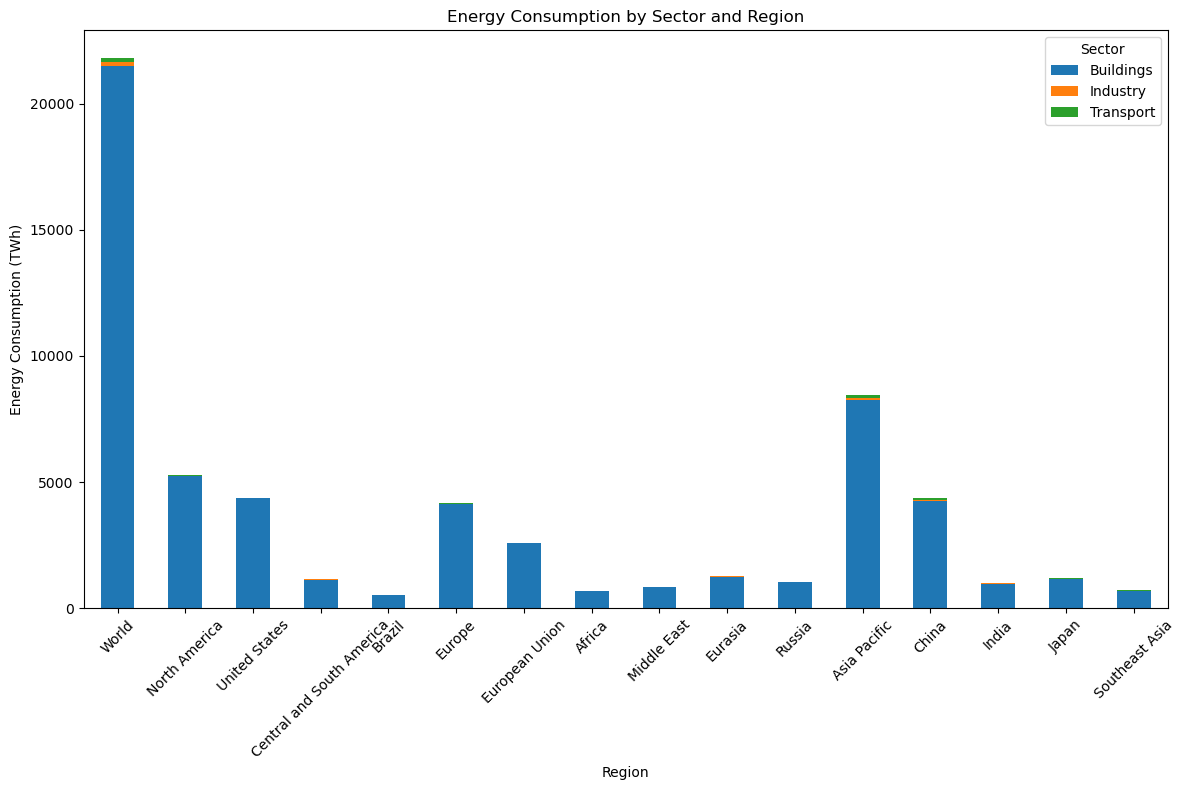

In [3875]:
# Sample data 
data = {
    'Region': ['World', 'North America', 'United States', 'Central and South America', 'Brazil',
               'Europe', 'European Union', 'Africa', 'Middle East', 'Eurasia', 'Russia', 'Asia Pacific',
               'China', 'India', 'Japan', 'Southeast Asia'],
    'Buildings': [21511, 5230, 4354, 1129, 516, 4119, 2571, 687, 829, 1251, 1036, 8265, 4236, 972, 1164, 685],
    'Industry': [143.2, 17.8, 14.1, 7.2, 4.0, 19.6, 14.3, 3.9, 8.2, 8.6, 7.0, 77.9, 49.2, 7.8, 6.1, 6.2],
    'Transport': [172.8, 19.0, 15.1, 7.1, 4.0, 16.7, 12.4, 4.5, 10.5, 10.0, 8.4, 104.9, 66.4, 14.6, 4.8, 9.7]  
}

# Create DataFrame
df = pd.DataFrame(data)

# Set 'Region' as the index
df.set_index('Region', inplace=True)

# Plotting the stacked bar chart
ax = df.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_title('Energy Consumption by Sector and Region')
ax.set_xlabel('Region')
ax.set_ylabel('Energy Consumption (TWh)')
ax.legend(title='Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


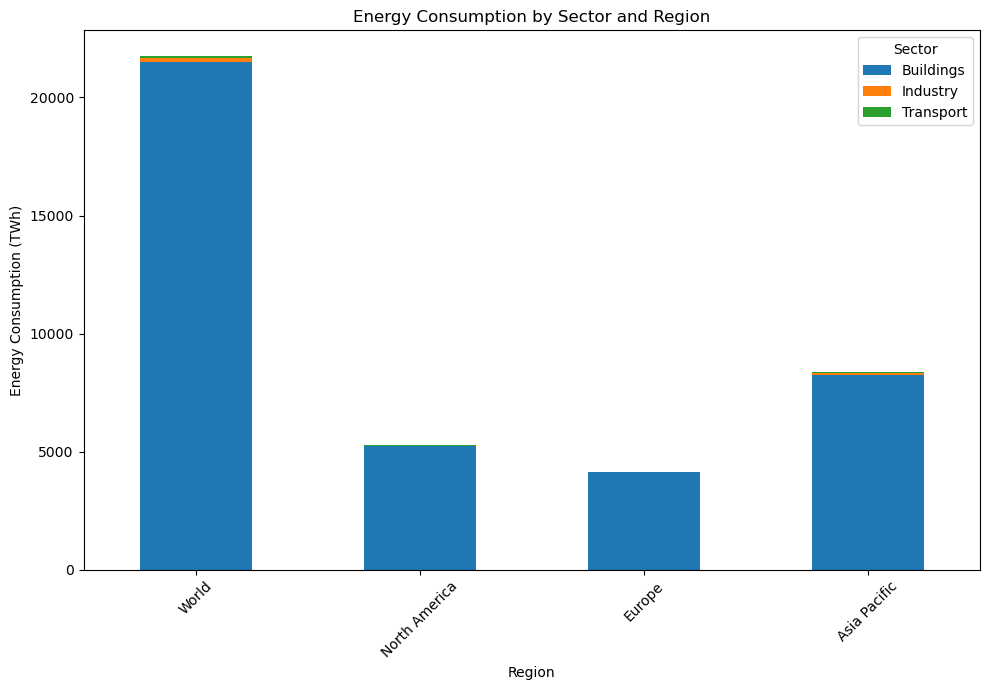

In [3876]:
# Sample data structure
data = {
    'Region': ['World', 'North America', 'Europe', 'Asia Pacific'],
    'Buildings': [21511, 5230, 4119, 8265],
    'Industry': [143.2, 17.8, 19.6, 77.9],
    'Transport': [101.1,29.6, 15.2, 22.1, ] 
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Region', inplace=True)

# Plotting
ax = df.plot(kind='bar', stacked=True, figsize=(10, 7))
ax.set_title('Energy Consumption by Sector and Region')
ax.set_xlabel('Region')
ax.set_ylabel('Energy Consumption (TWh)')
ax.legend(title='Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


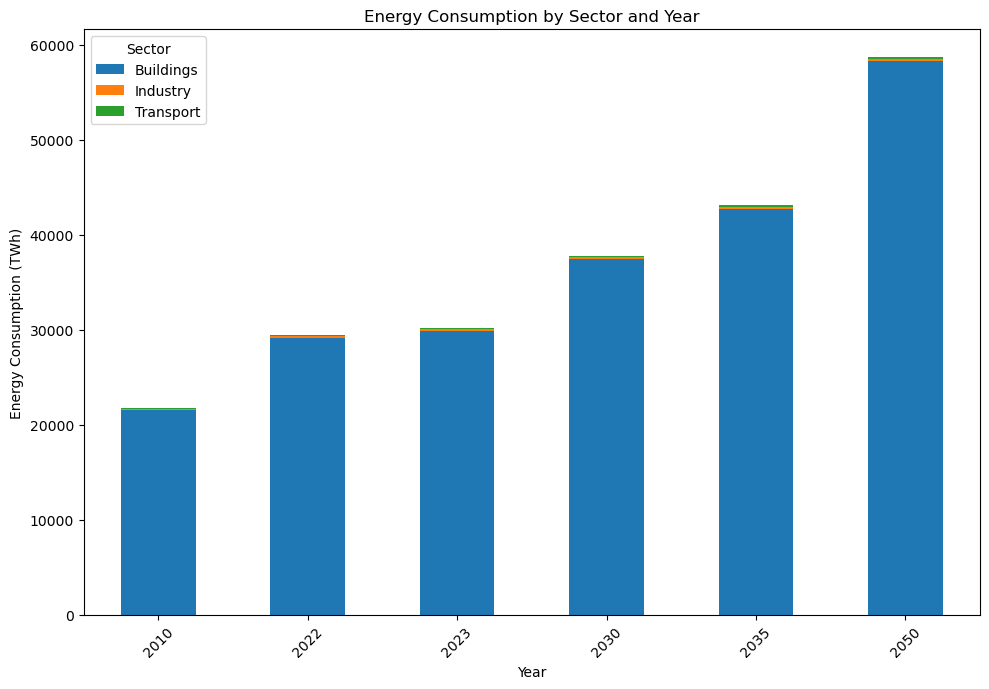

In [3877]:
# Sample data structure
data = {
    'Year': ['2010', '2022', '2023', '2030', '2035', '2050'],
    'Buildings': [21511, 29145, 29863, 37489, 42766, 58352],
    'Industry': [143.2, 169.7, 172.8, 193.1, 199.7, 209.5],
    'Transport': [101.1, 117.7, 122, 131.7, 132.6, 139.9,] 
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))
df.set_index('Year').plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Energy Consumption by Sector and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (TWh)')
ax.legend(title='Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3878]:
Total_energy_supply_cleaned.head()
Total_energy_consumption_cleaned.head()

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Total final consumption,EJ,World,"377,4","437,3","444,7","485,4","498,5","533,3","457,3","449,6","434,4"
2,Total final consumption,EJ,North America,"76,6","79,4","78,6","78,3","74,9","71,0","74,3","67,3","55,5"
3,Total final consumption,EJ,United States,"63,8","66,5","65,7","65,2","61,9","57,4","61,9","55,7","44,7"
4,Total final consumption,EJ,Central and South America,"19,2","21,2","21,4","23,6","25,3","30,4","22,7","23,4","24,5"


In [3879]:
Total_energy_suply_consumption = pd.concat(
    [Total_energy_supply_cleaned, Total_energy_consumption_cleaned ],
    axis=1,
    keys=["Total Supply", "Total Consumption"]
)
#print(Renewable_consumption_by_sector.head())
Total_energy_suply_consumption.head(20)

Total Supply                                  \
                   Flow Unit                     Region   
0                     0    0                          0   
1   Total energy supply   EJ                      World   
2   Total energy supply   EJ              North America   
3   Total energy supply   EJ              United States   
4   Total energy supply   EJ  Central and South America   
5   Total energy supply   EJ                     Brazil   
6   Total energy supply   EJ                     Europe   
7   Total energy supply   EJ             European Union   
8   Total energy supply   EJ                     Africa   
9   Total energy supply   EJ                Middle East   
10  Total energy supply   EJ                    Eurasia   
11  Total energy supply   EJ                     Russia   
12  Total energy supply   EJ               Asia Pacific   
13  Total energy supply   EJ                      China   
14  Total energy supply   EJ                      India   
15  Total energy supply   EJ                      Japan   
16  Total energy supply   EJ             Southeast Asia   

                                                        \
   Stated Policies Scenario Stated Policies Scenario.1   
0                      2010                       2022   
1                     536,3                      629,0   
2                     112,6                      113,7   
3                      94,1                       93,4   
4                      26,6                       29,3   
5                      12,1                       13,9   
6                      89,0                       77,0   
7                      64,2                       55,4   
8                      25,4                       33,5   
9                      26,1                       35,0   
10                     35,8                       42,2   
11                     29,1                       33,9   
12                    205,9                      283,1   
13                    107,3                      160,1   
14                     27,7                       42,7   
15                     20,9                       16,4   
16                     21,5                       31,5   

                                                          \
   Stated Policies Scenario.2 Stated Policies Scenario.3   
0                        2023                       2030   
1                       642,1                      676,5   
2                       112,3                      108,8   
3                        91,9                       88,2   
4                        29,8                       32,7   
5                        14,4                       16,1   
6                        74,4                       73,0   
7                        53,0                       50,9   
8                        33,9                       36,9   
9                        35,6                       40,6   
10                       42,7                       43,1   
11                       34,4                       34,0   
12                      297,0                      321,9   
13                      170,4                      178,0   
14                       45,4                       55,8   
15                       16,4                       15,0   
16                       33,0                       39,6   

                                                          \
   Stated Policies Scenario.4 Stated Policies Scenario.5   
0                        2035                       2050   
1                       681,6                      721,9   
2                       103,6                       99,3   
3                        83,0                       78,0   
4                        35,2                       43,5   
5                        17,2                       21,3   
6                        70,2                       65,5   
7                        48,0                       42,8   
8                        39,8                

In [3880]:
rename_dict = {
    "Stated Policies Scenario": "SPS 2010",
    "Stated Policies Scenario.1": "SPS 2022",
    "Stated Policies Scenario.2": "SPS 2023",
    "Stated Policies Scenario.3": "SPS 2030",
    "Stated Policies Scenario.4": "SPS 2035",
    "Stated Policies Scenario.5": "SPS 2050",
    "Announced Pledges Scenario": "APS 2030",
    "Announced Pledges Scenario.1": "APS 2035",
    "Announced Pledges Scenario.2": "APS 2050",
}

Total_energy_suply_consumption = Total_energy_suply_consumption.rename(
    columns=rename_dict
)
Total_energy_suply_consumption = Total_energy_suply_consumption.drop(0)


In [3881]:
Total_energy_suply_consumption

Total Supply                                                    \
                   Flow Unit                     Region SPS 2010 SPS 2022   
1   Total energy supply   EJ                      World    536,3    629,0   
2   Total energy supply   EJ              North America    112,6    113,7   
3   Total energy supply   EJ              United States     94,1     93,4   
4   Total energy supply   EJ  Central and South America     26,6     29,3   
5   Total energy supply   EJ                     Brazil     12,1     13,9   
6   Total energy supply   EJ                     Europe     89,0     77,0   
7   Total energy supply   EJ             European Union     64,2     55,4   
8   Total energy supply   EJ                     Africa     25,4     33,5   
9   Total energy supply   EJ                Middle East     26,1     35,0   
10  Total energy supply   EJ                    Eurasia     35,8     42,2   
11  Total energy supply   EJ                     Russia     29,1     33,9   
12  Total energy supply   EJ               Asia Pacific    205,9    283,1   
13  Total energy supply   EJ                      China    107,3    160,1   
14  Total energy supply   EJ                      India     27,7     42,7   
15  Total energy supply   EJ                      Japan     20,9     16,4   
16  Total energy supply   EJ             Southeast Asia     21,5     31,5   

                                                 ...  \
   SPS 2023 SPS 2030 SPS 2035 SPS 2050 APS 2030  ...   
1     642,1    676,5    681,6    721,9    640,8  ...   
2     112,3    108,8    103,6     99,3    103,7  ...   
3      91,9     88,2     83,0     78,0     84,7  ...   
4      29,8     32,7     35,2     43,5     32,3  ...   
5      14,4     16,1     17,2     21,3     16,2  ...   
6      74,4     73,0     70,2     65,5     70,4  ...   
7      53,0     50,9     48,0     42,8     49,2  ...   
8      33,9     36,9     39,8     51,7     30,8  ...   
9      35,6     40,6     44,3     55,9     39,6  ...   
10     42,7     43,1     43,3     44,1     40,5  ...   
11     34,4     34,0     33,7     32,7     32,2  ...   
12    297,0    321,9    324,5    338,0    306,9  ...   
13    170,4    178,0    171,4    162,0    171,1  ...   
14     45,4     55,8     60,7     70,5     50,6  ...   
15     16,4     15,0     14,0     12,3     14,7  ...   
16     33,0     39,6     43,8     54,2     38,9  ...   

            Total Consumption                                               \
                       Region SPS 2010 SPS 2022 SPS 2023 SPS 2030 SPS 2035   
1                       World    377,4    437,3    444,7    485,4    498,5   
2               North America     76,6     79,4     78,6     78,3     74,9   
3               United States     63,8     66,5     65,7     65,2     61,9   
4   Central and South America     19,2     21,2     21,4     23,6     25,3   
5                      Brazil      9,1     10,4     10,6     11,5     12,2   
6                      Europe     62,6     56,9     55,2     55,5     53,0   
7              European Union     45,4     41,5     39,9     39,3     36,8   
8                      Africa     17,6     23,0     23,1     26,3     28,8   
9                 Middle East     18,3     23,9     24,2     29,1     32,1   
10                    Eurasia     24,1     28,8     29,1     30,8     31,3   
11                     Russia     19,5     23,2     23,5     24,3     24,3   
12               Asia Pacific    144,2    189,0    196,6    222,3    232,2   
13                      China     76,3    105,3    110,8    122,5    123,7   
14                      India     18,9     29,2     31,0     38,7     43,6   
15                      Japan     14,1     11,6     11,4     10,7     10,2   
16             Southeast Asia     14,8     20,2     21,0     25,8     28,6   

                                        
   SPS 2050 APS 2030 APS 2035 APS 2050  
1     533,3    457,3    449,6    434,4  
2      71,0     74,3     67,3     55,5  
3      57,4     61,9     55,7     44,7  
4    

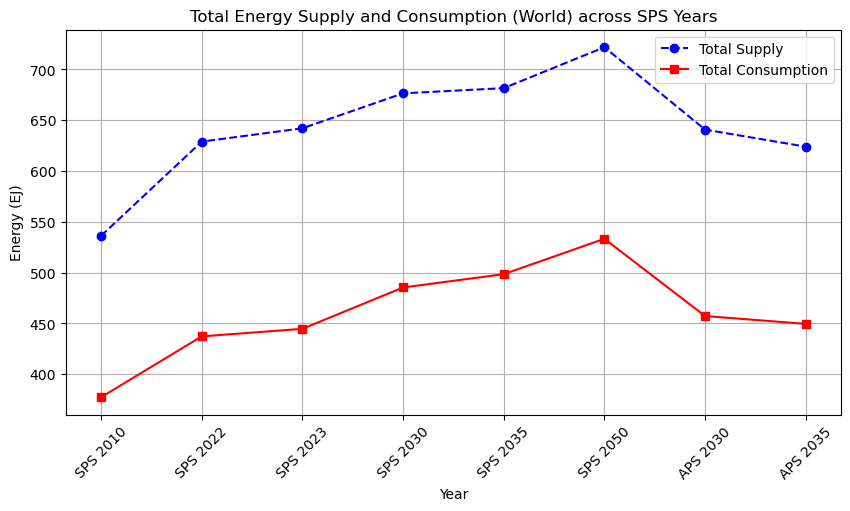

In [ ]:
# Sample data 
data = {
    'Unit': ['EJ', 'EJ'],
    'Region': ['World', 'North America'],
    'SPS 2010': [536.3, 112.6],
    'SPS 2022': [629.0, 113.7],
    'SPS 2023': [642.1, 112.3],
    'SPS 2030': [676.5, 108.8],
    'SPS 2035': [681.6, 103.6],
    'SPS 2050': [721.9, 99.3],
    'APS 2030': [640.8, 103.7],
    'APS 2035': [624.0, 96.3]
}

consumption_data = {
    'Region': ['World', 'North America'],
    'SPS 2010': [377.4, 76.6],
    'SPS 2022': [437.3, 79.4],
    'SPS 2023': [444.7, 78.6],
    'SPS 2030': [485.4, 78.3],
    'SPS 2035': [498.5, 74.9],
    'SPS 2050': [533.3, 71.0],
    'APS 2030': [457.3, 74.3],
    'APS 2035': [449.6, 67.3]
}

# Create DataFrames
df_supply = pd.DataFrame(data)
df_consumption = pd.DataFrame(consumption_data)

# Filter for "World" data
df_supply_world = df_supply[df_supply["Region"] == "World"].drop(columns=["Unit", "Region"]).T
df_consumption_world = df_consumption[df_consumption["Region"] == "World"].drop(columns=["Region"]).T

# Convert to numeric
df_supply_world.columns = ["Supply"]
df_consumption_world.columns = ["Consumption"]

# Merge for plotting
df_plot = pd.concat([df_supply_world, df_consumption_world], axis=1)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_plot.index, df_plot["Supply"], marker='o', label="Total Supply", linestyle='--', color='b')
plt.plot(df_plot.index, df_plot["Consumption"], marker='s', label="Total Consumption", linestyle='-', color='r')

plt.xlabel("Year")
plt.ylabel("Energy (EJ)")
plt.title("Total Energy Supply and Consumption (World) across SPS Years")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# The total energy supply and consumption data for the "World" region contains energy generated byCoial, Oil, Natural gas, Biofuels and waste, Hydro, Nuclear, Solar, Wind, Geothermal, and other sources.
# The data is in Exajoules (EJ) and covers the years 2010, 2022, 2023, 2030, 2035, and 2050 under the Stated Policies Scenario (SPS) and Announced Pledges Scenario (APS).

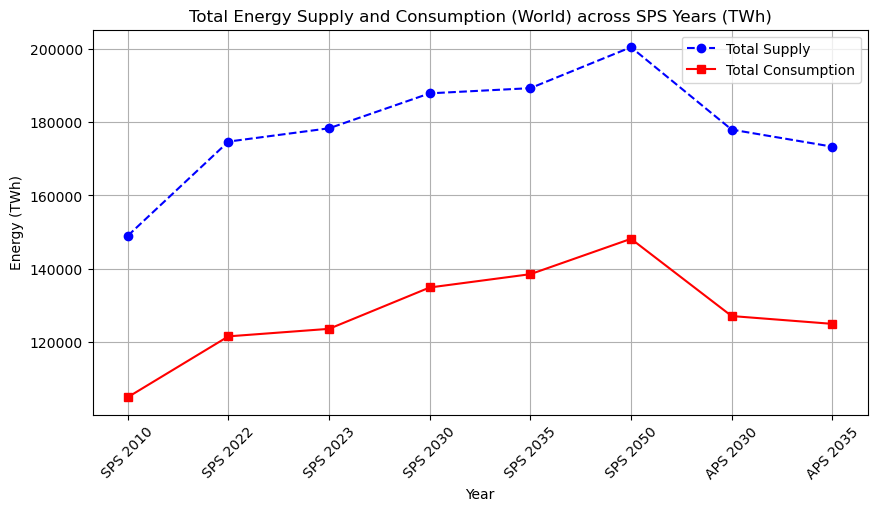

In [3883]:
# Conversion factor
EJ_to_TWh = 277.778

# Sample data 
data = {
    'Unit': ['EJ', 'EJ'],
    'Region': ['World', 'North America'],
    'SPS 2010': [536.3, 112.6],
    'SPS 2022': [629.0, 113.7],
    'SPS 2023': [642.1, 112.3],
    'SPS 2030': [676.5, 108.8],
    'SPS 2035': [681.6, 103.6],
    'SPS 2050': [721.9, 99.3],
    'APS 2030': [640.8, 103.7],
    'APS 2035': [624.0, 96.3]
}

consumption_data = {
    'Region': ['World', 'North America'],
    'SPS 2010': [377.4, 76.6],
    'SPS 2022': [437.3, 79.4],
    'SPS 2023': [444.7, 78.6],
    'SPS 2030': [485.4, 78.3],
    'SPS 2035': [498.5, 74.9],
    'SPS 2050': [533.3, 71.0],
    'APS 2030': [457.3, 74.3],
    'APS 2035': [449.6, 67.3]
}

# Create DataFrames
df_supply = pd.DataFrame(data)
df_consumption = pd.DataFrame(consumption_data)

# Convert values from EJ to TWh (excluding non-numeric columns)
df_supply.iloc[:, 2:] = df_supply.iloc[:, 2:] * EJ_to_TWh
df_consumption.iloc[:, 1:] = df_consumption.iloc[:, 1:] * EJ_to_TWh

# Filter for "World" data
df_supply_world = df_supply[df_supply["Region"] == "World"].drop(columns=["Unit", "Region"]).T
df_consumption_world = df_consumption[df_consumption["Region"] == "World"].drop(columns=["Region"]).T

# Convert to numeric and rename columns
df_supply_world.columns = ["Supply (TWh)"]
df_consumption_world.columns = ["Consumption (TWh)"]

# Merge for plotting
df_plot = pd.concat([df_supply_world, df_consumption_world], axis=1)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_plot.index, df_plot["Supply (TWh)"], marker='o', label="Total Supply", linestyle='--', color='b')
plt.plot(df_plot.index, df_plot["Consumption (TWh)"], marker='s', label="Total Consumption", linestyle='-', color='r')

plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.title("Total Energy Supply and Consumption (World) across SPS Years (TWh)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


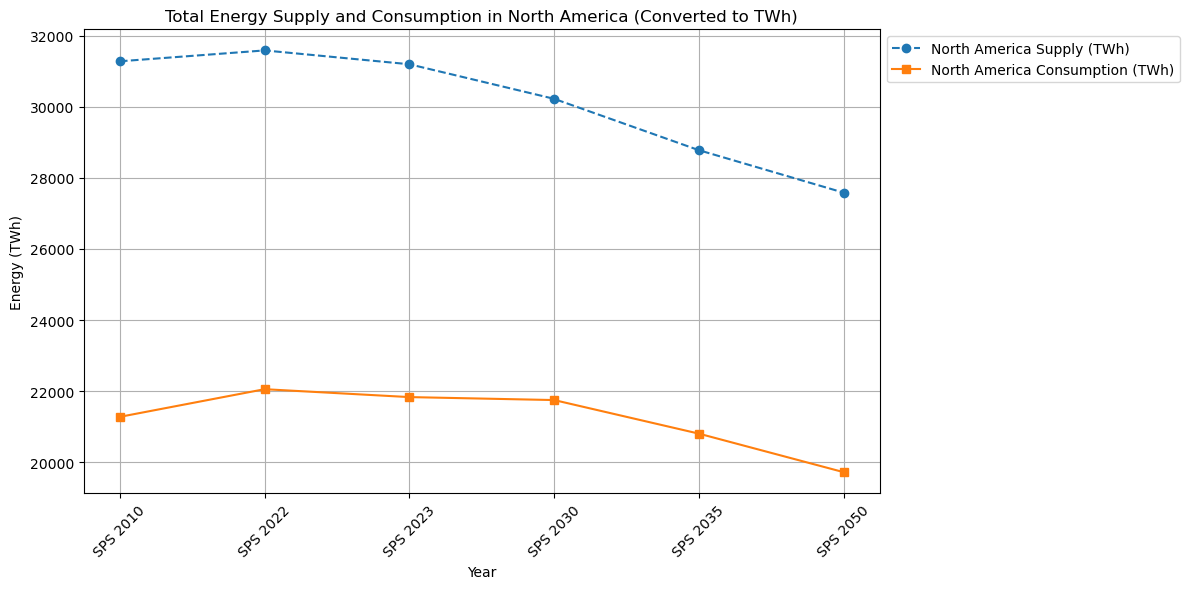

In [3884]:
# Conversion factor
EJ_to_TWh = 277.778

# Sample data 
data = {
    'Unit': ['EJ', 'EJ'],
    'Region': ['World', 'North America'],
    'SPS 2010': [536.3, 112.6],
    'SPS 2022': [629.0, 113.7],
    'SPS 2023': [642.1, 112.3],
    'SPS 2030': [676.5, 108.8],
    'SPS 2035': [681.6, 103.6],
    'SPS 2050': [721.9, 99.3],
    'APS 2030': [640.8, 103.7],
    'APS 2035': [624.0, 96.3]
}

consumption_data = {
    'Region': ['World', 'North America'],
    'SPS 2010': [377.4, 76.6],
    'SPS 2022': [437.3, 79.4],
    'SPS 2023': [444.7, 78.6],
    'SPS 2030': [485.4, 78.3],
    'SPS 2035': [498.5, 74.9],
    'SPS 2050': [533.3, 71.0],
    'APS 2030': [457.3, 74.3],
    'APS 2035': [449.6, 67.3]
}

# Create DataFrames
df_supply = pd.DataFrame(data)
df_consumption = pd.DataFrame(consumption_data)

# Drop 'World' row for regional analysis
df_supply = df_supply[df_supply["Region"] != "World"].set_index("Region").drop(columns=["Unit"])
df_consumption = df_consumption[df_consumption["Region"] != "World"].set_index("Region")

# Convert values from EJ to TWh
df_supply = df_supply * EJ_to_TWh
df_consumption = df_consumption * EJ_to_TWh

# Extract years dynamically
years = [col for col in df_supply.columns if "SPS" in col]

# Plot
plt.figure(figsize=(12, 6))

for region in df_supply.index:
    plt.plot(years, df_supply.loc[region, years], marker='o', linestyle='--', label=f"{region} Supply (TWh)")
    plt.plot(years, df_consumption.loc[region, years], marker='s', linestyle='-', label=f"{region} Consumption (TWh)")

# Formatting
plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.title("Total Energy Supply and Consumption in North America (Converted to TWh)")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


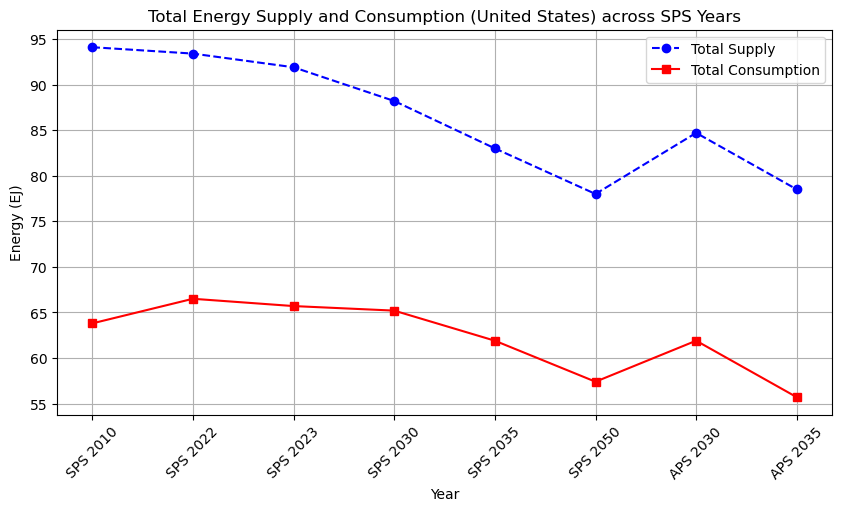

In [3885]:
# Sample data 
data = {
    'Unit': ['EJ', 'EJ'],
    'Region': ['World', 'United States'],
    'SPS 2010': [536.3, 94.1],
    'SPS 2022': [629.0, 93.4],
    'SPS 2023': [642.1, 91.9],
    'SPS 2030': [676.5, 88.2],
    'SPS 2035': [681.6, 83.0],
    'SPS 2050': [721.9, 78.0],
    'APS 2030': [640.8, 84.7],
    'APS 2035': [624.0, 78.5]
}

consumption_data = {
    'Region': ['World', 'United States'],
    'SPS 2010': [377.4, 63.8],
    'SPS 2022': [437.3, 66.5],
    'SPS 2023': [444.7, 65.7],
    'SPS 2030': [485.4, 65.2],
    'SPS 2035': [498.5, 61.9],
    'SPS 2050': [533.3, 57.4],
    'APS 2030': [457.3, 61.9],
    'APS 2035': [449.6, 55.7]
}

# Create DataFrames
df_supply = pd.DataFrame(data)
df_consumption = pd.DataFrame(consumption_data)

# Filter for "United States"
df_supply_us = df_supply[df_supply["Region"] == "United States"].drop(columns=["Unit", "Region"]).T
df_consumption_us = df_consumption[df_consumption["Region"] == "United States"].drop(columns=["Region"]).T

# Convert to numeric
df_supply_us.columns = ["Supply"]
df_consumption_us.columns = ["Consumption"]

# Merge for plotting
df_plot = pd.concat([df_supply_us, df_consumption_us], axis=1)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_plot.index, df_plot["Supply"], marker='o', linestyle='--', color='b', label="Total Supply")
plt.plot(df_plot.index, df_plot["Consumption"], marker='s', linestyle='-', color='r', label="Total Consumption")

# Formatting
plt.xlabel("Year")
plt.ylabel("Energy (EJ)")
plt.title("Total Energy Supply and Consumption (United States) across SPS Years")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


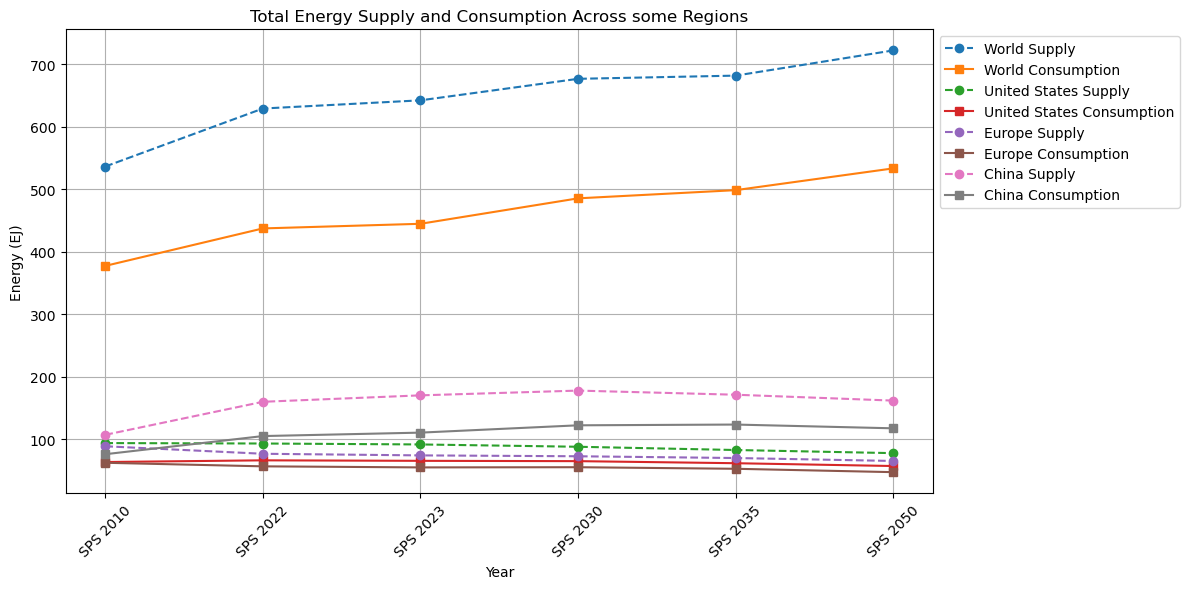

In [3886]:
# Sample data 
data = {
    'Unit': ['EJ'] * 4,
    'Region': ['World', 'United States', 'Europe', 'China'],
    'SPS 2010': [536.3, 94.1, 89.0, 107.3],
    'SPS 2022': [629.0, 93.4, 77.0, 160.1],
    'SPS 2023': [642.1, 91.9,  74.4, 170.4],
    'SPS 2030': [676.5, 88.2, 73.0, 178.0],
    'SPS 2035': [681.6, 83.0, 70.2, 171.4],
    'SPS 2050': [721.9, 78.0, 65.5, 162.0],
    'APS 2030': [640.8, 84.7, 70.4, 171.1],
    'APS 2035': [624.0, 78.5, 65.1, 157.8]
}

consumption_data = {
    'Region': ['World', 'United States', 'Europe', 'China'],
    'SPS 2010': [377.4, 63.8, 62.6, 76.3],
    'SPS 2022': [437.3, 66.5, 56.9, 105.3],
    'SPS 2023': [444.7, 65.7, 55.2, 110.8],
    'SPS 2030': [485.4, 65.2, 55.5, 122.5],
    'SPS 2035': [498.5, 61.9, 53.0, 123.7],
    'SPS 2050': [533.3, 57.4, 47.6, 117.7],
    'APS 2030': [457.3, 61.9, 53.0, 117.2],
    'APS 2035': [449.6, 55.7, 48.2, 113.1]
}

# Create DataFrames
df_supply = pd.DataFrame(data)
df_consumption = pd.DataFrame(consumption_data)

# Extract years dynamically
years = [col for col in df_supply.columns if "SPS" in col]

# Remove 'Unit' column
df_supply = df_supply.set_index("Region").drop(columns=["Unit"], errors="ignore")
df_consumption = df_consumption.set_index("Region")

# Plot
plt.figure(figsize=(12, 6))

for region in df_supply.index:
    plt.plot(years, df_supply.loc[region, years], marker='o', linestyle='--', label=f"{region} Supply")
    plt.plot(years, df_consumption.loc[region, years], marker='s', linestyle='-', label=f"{region} Consumption")

# Formatting
plt.xlabel("Year")
plt.ylabel("Energy (EJ)")
plt.title("Total Energy Supply and Consumption Across some Regions")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3887]:
Solar_wind_generation = pd.concat(
    [Solar_energy_generation_cleaned, Wind_energy_generation_cleaned ],
    axis=1,
    keys=["Solar Generation", "Wind Generation", "Total Supply"]
)
#print(Renewable_consumption_by_sector.head())
Solar_wind_generation.head(20)

/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/3651855890.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  Solar_wind_generation = pd.concat(


Solar Generation                                  \
                      Flow Unit                     Region   
0                        0    0                          0   
1   Electricity generation  TWh                      World   
2   Electricity generation  TWh              North America   
3   Electricity generation  TWh              United States   
4   Electricity generation  TWh  Central and South America   
5   Electricity generation  TWh                     Brazil   
6   Electricity generation  TWh                     Europe   
7   Electricity generation  TWh             European Union   
8   Electricity generation  TWh                     Africa   
9   Electricity generation  TWh                Middle East   
10  Electricity generation  TWh                    Eurasia   
11  Electricity generation  TWh                     Russia   
12  Electricity generation  TWh               Asia Pacific   
13  Electricity generation  TWh                      China   
14  Electricity generation  TWh                      India   
15  Electricity generation  TWh                      Japan   
16  Electricity generation  TWh             Southeast Asia   

                                                        \
   Stated Policies Scenario Stated Policies Scenario.1   
0                      2010                       2022   
1                  32                       1 294        
2                   3                         210        
3                   3                         184        
4                   0                          55        
5                   0                          30        
6                  23                         250        
7                  22                         206        
8                   0                          15        
9                   0                          16        
10                  0                           5        
11                  0                           3        
12                  6                         742        
13                  1                         427        
14                  0                         105        
15                  4                          93        
16                  0                          40        

                                                          \
   Stated Policies Scenario.2 Stated Policies Scenario.3   
0                        2023                       2030   
1                  1 612                      6 452        
2                    247                        904        
3                    212                        833        
4                     78                        216        
5                     49                        129        
6                    293                        871        
7                    240                        705        
8                     19                        136        
9                     23                        213        
10                     6                         20        
11                     3                          5        
12                   946                      4 092        
13                   584                      3 001        
14                   125                        539        
15                   100                        168        
16                    45                        108        

                                                          \
   Stated Policies Scenario.4 Stated Policies Scenario.5   
0                        2035                       2050   
1                  10 689                     21 557       
2                   1 549                      3 633       
3                   1 447                      3 434       
4                     274                        588       
5                     155                        253       
6                   1 226                      1 638       
7                     989                      

In [3888]:
rename_dict = {
    "Stated Policies Scenario": "SPS 2010",
    "Stated Policies Scenario.1": "SPS 2022",
    "Stated Policies Scenario.2": "SPS 2023",
    "Stated Policies Scenario.3": "SPS 2030",
    "Stated Policies Scenario.4": "SPS 2035",
    "Stated Policies Scenario.5": "SPS 2050",
    "Announced Pledges Scenario": "APS 2030",
    "Announced Pledges Scenario.1": "APS 2035",
    "Announced Pledges Scenario.2": "APS 2050",
}

Solar_wind_generation = Solar_wind_generation.rename(
    columns=rename_dict
)
Solar_wind_generation = Solar_wind_generation.drop(0)


In [3889]:
Solar_wind_generation

Solar Generation                                             \
                      Flow Unit                     Region   SPS 2010   
1   Electricity generation  TWh                      World   32         
2   Electricity generation  TWh              North America    3         
3   Electricity generation  TWh              United States    3         
4   Electricity generation  TWh  Central and South America    0         
5   Electricity generation  TWh                     Brazil    0         
6   Electricity generation  TWh                     Europe   23         
7   Electricity generation  TWh             European Union   22         
8   Electricity generation  TWh                     Africa    0         
9   Electricity generation  TWh                Middle East    0         
10  Electricity generation  TWh                    Eurasia    0         
11  Electricity generation  TWh                     Russia    0         
12  Electricity generation  TWh               Asia Pacific    6         
13  Electricity generation  TWh                      China    1         
14  Electricity generation  TWh                      India    0         
15  Electricity generation  TWh                      Japan    4         
16  Electricity generation  TWh             Southeast Asia    0         

                                                                            \
      SPS 2022    SPS 2023    SPS 2030    SPS 2035    SPS 2050    APS 2030   
1   1 294       1 612       6 452       10 689      21 557      7 512        
2     210         247         904        1 549       3 633      1 157        
3     184         212         833        1 447       3 434      1 075        
4      55          78         216          274         588        358        
5      30          49         129          155         253        197        
6     250         293         871        1 226       1 638      1 021        
7     206         240         705          989       1 303        827        
8      15          19         136          271         645        294        
9      16          23         213          377         967        275        
10      5           6          20           27          40         26        
11      3           3           5            6          10          8        
12    742         946       4 092        6 965      14 047      4 380        
13    427         584       3 001        5 107       9 800      3 092        
14    105         125         539        1 015       2 552        557        
15     93         100         168          208         250        171        
16     40          45         108          212         640        215        

    ...            Wind Generation                                     \
    ...                     Region   SPS 2010    SPS 2022    SPS 2023   
1   ...                      World   342       2 120       2 336        
2   ...              North America   105         497         488        
3   ...              United States    95         439         430        
4   ...  Central and South America     3         117         135        
5   ...                     Brazil     2          82          95        
6   ...                     Europe   154         556         613        
7   ...             European Union   140         421         479        
8   ...                     Africa     2          25          25        
9   ...                Middle East     0           4           4        
10  ...                    Eurasia     0           8           9        
11  ...                     Russia     0           6           6        
12  ...               Asia Pacific    77         913       1 060        
13  ...                      China    45         763         886        
14  ...                      India    20          81          94        
15  ...                      Japan     4           9          10        
16  ...             Southeast Asia     0         

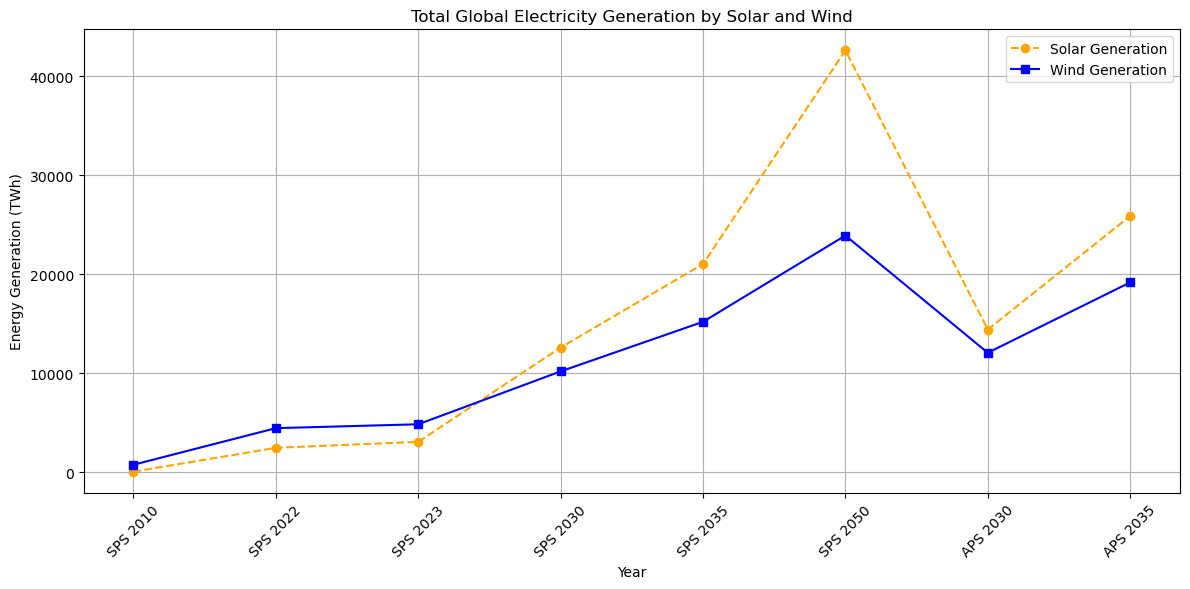

In [3890]:
# Sample data 
data_solar = {
    'Region': ['World', 'North America', 'United States', 'Europe', 'China', 'India'],
    'SPS 2010': [32, 3, 3, 23, 1, 0],
    'SPS 2022': [1294, 210, 184, 250, 427, 105],
    'SPS 2023': [1612, 247, 212, 293, 584, 125],
    'SPS 2030': [6452, 904, 833, 871, 3001, 539],
    'SPS 2035': [10689, 1549, 1447, 1226, 5107, 1015],
    'SPS 2050': [21557, 3633, 3434, 1638, 9800, 2552],
    'APS 2030': [7512, 1157, 1075, 1021, 3092, 557],
    'APS 2035': [13673, 2117, 1939, 1438, 5494, 1225]
}

data_wind = {
    'Region': ['World', 'North America', 'United States', 'Europe', 'China', 'India'],
    'SPS 2010': [342, 105, 95, 154, 45, 20],
    'SPS 2022': [2120, 497, 439, 556, 763, 81],
    'SPS 2023': [2336, 488, 430, 613, 886, 94],
    'SPS 2030': [5024, 954, 843, 1209, 1998, 163],
    'SPS 2035': [7535, 1462, 1301, 1844, 2715, 341],
    'SPS 2050': [12347, 2259, 1942, 2687, 3629, 1049],
    'APS 2030': [5938, 1286, 1143, 1441, 2086, 176],
    'APS 2035': [9548, 2170, 1933, 2297, 2839, 393]
}

# Convert dictionaries to DataFrames
df_solar = pd.DataFrame(data_solar)
df_wind = pd.DataFrame(data_wind)

# Drop 'Region' column and sum across all regions to get total generation per year
df_total_solar = df_solar.drop(columns=["Region"]).sum().rename("Solar Generation")
df_total_wind = df_wind.drop(columns=["Region"]).sum().rename("Wind Generation")

# Combine into one DataFrame
df_total_generation = pd.concat([df_total_solar, df_total_wind], axis=1)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_total_generation.index, df_total_generation["Solar Generation"], marker='o', linestyle='--', color='orange', label="Solar Generation")
plt.plot(df_total_generation.index, df_total_generation["Wind Generation"], marker='s', linestyle='-', color='blue', label="Wind Generation")

# Formatting
plt.xlabel("Year")
plt.ylabel("Energy Generation (TWh)")
plt.title("Total Global Electricity Generation by Solar and Wind")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


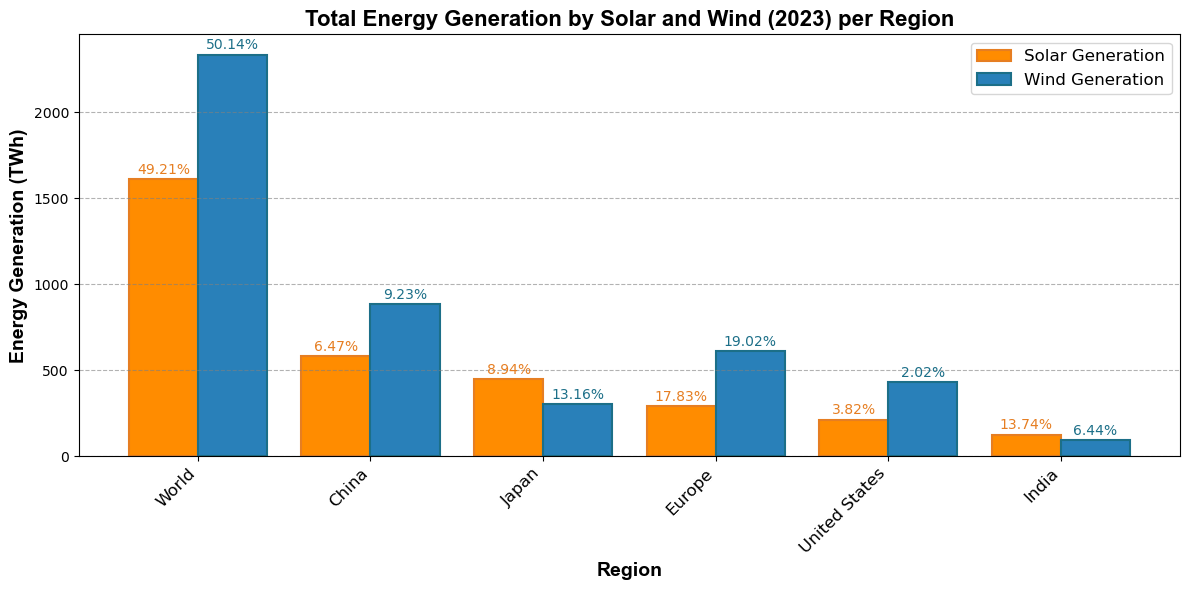

In [3891]:
# Sample data 
data_solar = {
    'Region': ['World', 'United States', 'Europe', 'China', 'India', 'Japan'], 
    'SPS 2023': [1612, 212, 293, 584, 125, 450]  
}

data_wind = {
    'Region': ['World', 'United States', 'Europe', 'China', 'India', 'Japan'],  
    'SPS 2023': [2336, 430, 613, 886, 94, 300]  
}

# Convert dictionaries to DataFrames
df_solar = pd.DataFrame(data_solar).set_index("Region")
df_wind = pd.DataFrame(data_wind).set_index("Region")

# Merge the two DataFrames
df_generation = df_solar.rename(columns={"SPS 2023": "Solar Generation"}).join(
    df_wind.rename(columns={"SPS 2023": "Wind Generation"})
)

# Calculate the total generation for Solar and Wind
total_solar = df_generation["Solar Generation"].sum()
total_wind = df_generation["Wind Generation"].sum()

# Calculate the percentage contribution of each region's Solar and Wind generation
df_generation['Solar % of Total'] = (df_generation['Solar Generation'] / total_solar) * 100
df_generation['Wind % of Total'] = (df_generation['Wind Generation'] / total_wind) * 100

# Sort the data by Solar generation
sorted_data = df_generation.sort_values(by='Solar Generation', ascending=False)

# Plot settings
regions = sorted_data.index
x = np.arange(len(regions))  # X-axis positions
width = 0.4  # Bar width

# Create the plot
plt.figure(figsize=(12, 6))

# Create a bar plot for Solar and Wind generation with modern styling
plt.bar(x - width/2, sorted_data["Solar Generation"], width, label="Solar Generation", color='#FF8C00', edgecolor='#e67e22', linewidth=1.5)
plt.bar(x + width/2, sorted_data["Wind Generation"], width, label="Wind Generation", color='#2980b9', edgecolor='#1c6f88', linewidth=1.5)

# Formatting
plt.xlabel("Region", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Energy Generation (TWh)", fontsize=14, fontweight='bold', family='Arial')
plt.title("Total Energy Generation by Solar and Wind (2023) per Region", fontsize=16, fontweight='bold', family='Arial')

# Adjust x-axis labels
plt.xticks(ticks=x, labels=regions, rotation=45, ha='right', fontsize=12)

# Add a legend
plt.legend(fontsize=12)

# Add gridlines with a subtle style for clarity
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.6, zorder=0)

# Display the percentage contributions for Solar and Wind for each region
for i, region in enumerate(regions):
    plt.text(i - width/2, sorted_data["Solar Generation"].iloc[i] + 30, f"{df_generation['Solar % of Total'].iloc[i]:.2f}%", ha='center', fontsize=10, color='#e67e22')
    plt.text(i + width/2, sorted_data["Wind Generation"].iloc[i] + 30, f"{df_generation['Wind % of Total'].iloc[i]:.2f}%", ha='center', fontsize=10, color='#1c6f88')

# Adjust layout for a clean and modern look
plt.tight_layout()

# Show the plot
plt.show()


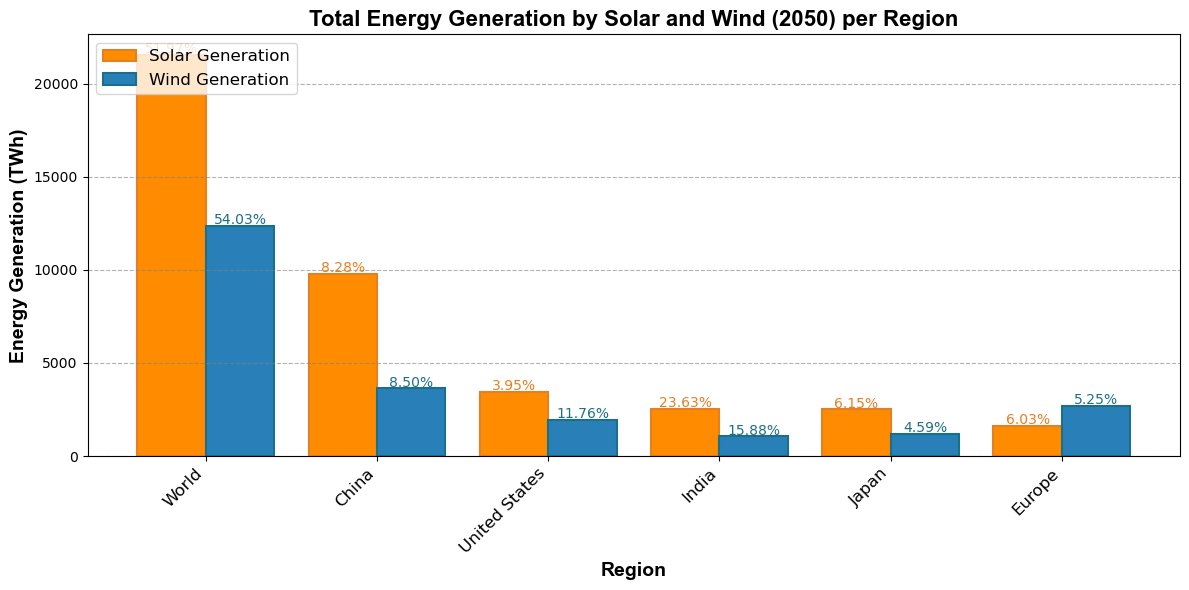

In [3892]:
# Sample data 
data_solar = {
    'Region': ['World', 'United States', 'Europe', 'China', 'India', 'Japan'], 
    'SPS 2050': [21557, 3434, 1638, 9800, 2552, 2500] 
}

data_wind = {
    'Region': ['World',  'United States', 'Europe', 'China', 'India', 'Japan'], 
    'SPS 2050': [12347, 1942, 2687, 3629, 1049, 1200] 
}

# Convert dictionaries to DataFrames
df_solar = pd.DataFrame(data_solar).set_index("Region")
df_wind = pd.DataFrame(data_wind).set_index("Region")

# Merge the two DataFrames
df_generation = df_solar.rename(columns={"SPS 2050": "Solar Generation"}).join(
    df_wind.rename(columns={"SPS 2050": "Wind Generation"})
)

# Calculate the total generation for Solar and Wind
total_solar = df_generation["Solar Generation"].sum()
total_wind = df_generation["Wind Generation"].sum()

# Calculate the percentage contribution of each region's Solar and Wind generation
df_generation['Solar % of Total'] = (df_generation['Solar Generation'] / total_solar) * 100
df_generation['Wind % of Total'] = (df_generation['Wind Generation'] / total_wind) * 100

# Sort the data by Solar generation
sorted_data = df_generation.sort_values(by='Solar Generation', ascending=False)

# Plot settings
regions = sorted_data.index
x = np.arange(len(regions))  # X-axis positions
width = 0.4  # Bar width

# Modernize the plot
plt.figure(figsize=(12, 6))

# Create the bars with updated colors and edge styling
plt.bar(x - width/2, sorted_data["Solar Generation"], width, label="Solar Generation", color='#FF8C00', edgecolor='#e67e22', linewidth=1.5)
plt.bar(x + width/2, sorted_data["Wind Generation"], width, label="Wind Generation", color='#2980b9', edgecolor='#1c6f88', linewidth=1.5)

# Formatting for a modern look
plt.xlabel("Region", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Energy Generation (TWh)", fontsize=14, fontweight='bold', family='Arial')
plt.title("Total Energy Generation by Solar and Wind (2050) per Region", fontsize=16, fontweight='bold', family='Arial')

# Adjust x-axis labels
plt.xticks(ticks=x, labels=regions, rotation=45, ha='right', fontsize=12)

# Add a legend with better styling
plt.legend(fontsize=12, loc='upper left')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.6, zorder=0)

# Display the percentage contributions for Solar and Wind for each region
for i, region in enumerate(regions):
    plt.text(i - width/2, sorted_data["Solar Generation"].iloc[i] + 100, f"{df_generation['Solar % of Total'].iloc[i]:.2f}%", ha='center', fontsize=10, color='#e67e22')
    plt.text(i + width/2, sorted_data["Wind Generation"].iloc[i] + 100, f"{df_generation['Wind % of Total'].iloc[i]:.2f}%", ha='center', fontsize=10, color='#1c6f88')

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


In [3893]:
Total_CO2_emissions_cleaned

,Flow,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,Total energy supply,Mt CO2,World,32 805,37 230,37 723,36 170,33 285,28 636,32 056,24 678,11 711
2,Total energy supply,Mt CO2,North America,6 485,5 728,5 571,4 778,4 056,2 878,3 837,2 458,374
3,Total energy supply,Mt CO2,United States,5 470,4 738,4 579,3 843,3 152,2 016,3 086,1 857,101
4,Total energy supply,Mt CO2,Central and South America,1 149,1 200,1 189,1 221,1 278,1 384,1 078,982,558
5,Total energy supply,Mt CO2,Brazil,412,452,446,455,470,505,384,345,174
6,Total energy supply,Mt CO2,Europe,4 679,3 832,3 573,2 919,2 434,1 609,2 461,1 610,350
7,Total energy supply,Mt CO2,European Union,3 277,2 682,2 446,1 872,1 470,746,1 576,972,106
8,Total energy supply,Mt CO2,Africa,1 161,1 428,1 420,1 472,1 543,1 971,1 329,1 288,1 233
9,Total energy supply,Mt CO2,Middle East,1 639,2 158,2 197,2 326,2 423,2 814,2 185,2 166,1 878


In [3894]:
rename_dict = {
    "Stated Policies Scenario": "SPS 2010",
    "Stated Policies Scenario.1": "SPS 2022",
    "Stated Policies Scenario.2": "SPS 2023",
    "Stated Policies Scenario.3": "SPS 2030",
    "Stated Policies Scenario.4": "SPS 2035",
    "Stated Policies Scenario.5": "SPS 2050",
    "Announced Pledges Scenario": "APS 2030",
    "Announced Pledges Scenario.1": "APS 2035",
    "Announced Pledges Scenario.2": "APS 2050",
}

Total_CO2_emissions_cleaned = Total_CO2_emissions_cleaned.rename(
    columns=rename_dict
)
Total_CO2_emissions_cleaned = Total_CO2_emissions_cleaned.drop(0)
Total_CO2_emissions_cleaned


,Flow,Unit,Region,SPS 2010,SPS 2022,SPS 2023,SPS 2030,SPS 2035,SPS 2050,APS 2030,APS 2035,APS 2050
1,Total energy supply,Mt CO2,World,32 805,37 230,37 723,36 170,33 285,28 636,32 056,24 678,11 711
2,Total energy supply,Mt CO2,North America,6 485,5 728,5 571,4 778,4 056,2 878,3 837,2 458,374
3,Total energy supply,Mt CO2,United States,5 470,4 738,4 579,3 843,3 152,2 016,3 086,1 857,101
4,Total energy supply,Mt CO2,Central and South America,1 149,1 200,1 189,1 221,1 278,1 384,1 078,982,558
5,Total energy supply,Mt CO2,Brazil,412,452,446,455,470,505,384,345,174
6,Total energy supply,Mt CO2,Europe,4 679,3 832,3 573,2 919,2 434,1 609,2 461,1 610,350
7,Total energy supply,Mt CO2,European Union,3 277,2 682,2 446,1 872,1 470,746,1 576,972,106
8,Total energy supply,Mt CO2,Africa,1 161,1 428,1 420,1 472,1 543,1 971,1 329,1 288,1 233
9,Total energy supply,Mt CO2,Middle East,1 639,2 158,2 197,2 326,2 423,2 814,2 185,2 166,1 878
10,Total energy supply,Mt CO2,Eurasia,2 141,2 339,2 388,2 380,2 356,2 286,2 162,2 008,1 659


In [3895]:
# Drop the row where all values (except 'Unit' and 'Region') are zero
Total_CO2_emissions_filtered = Total_CO2_emissions_cleaned.loc[~(Total_CO2_emissions_cleaned.iloc[:, 2:].eq(0).all(axis=1))]

# Save the cleaned data to a new file
Total_CO2_emissions_filtered



,Flow,Unit,Region,SPS 2010,SPS 2022,SPS 2023,SPS 2030,SPS 2035,SPS 2050,APS 2030,APS 2035,APS 2050
1,Total energy supply,Mt CO2,World,32 805,37 230,37 723,36 170,33 285,28 636,32 056,24 678,11 711
2,Total energy supply,Mt CO2,North America,6 485,5 728,5 571,4 778,4 056,2 878,3 837,2 458,374
3,Total energy supply,Mt CO2,United States,5 470,4 738,4 579,3 843,3 152,2 016,3 086,1 857,101
4,Total energy supply,Mt CO2,Central and South America,1 149,1 200,1 189,1 221,1 278,1 384,1 078,982,558
5,Total energy supply,Mt CO2,Brazil,412,452,446,455,470,505,384,345,174
6,Total energy supply,Mt CO2,Europe,4 679,3 832,3 573,2 919,2 434,1 609,2 461,1 610,350
7,Total energy supply,Mt CO2,European Union,3 277,2 682,2 446,1 872,1 470,746,1 576,972,106
8,Total energy supply,Mt CO2,Africa,1 161,1 428,1 420,1 472,1 543,1 971,1 329,1 288,1 233
9,Total energy supply,Mt CO2,Middle East,1 639,2 158,2 197,2 326,2 423,2 814,2 185,2 166,1 878
10,Total energy supply,Mt CO2,Eurasia,2 141,2 339,2 388,2 380,2 356,2 286,2 162,2 008,1 659


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/1653560590.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_CO2_emissions_filtered["Region"] = Total_CO2_emissions_filtered["Region"].astype(str).str.strip()
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/1653560590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_CO2_emissions_filtered[col] = (
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/1653560590.py:20: SettingWithCopyWarning: 
A value 

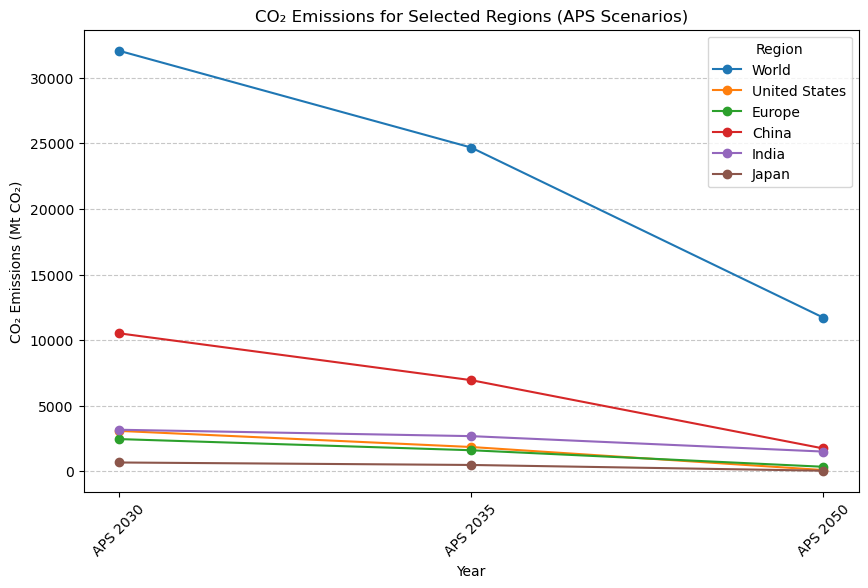

In [3896]:
# Define regions 
regions_of_interest = ["World", "United States", "China", "Europe", "Japan", "India"]

# Strip spaces from column names and region names
Total_CO2_emissions_filtered.columns = Total_CO2_emissions_filtered.columns.str.strip()
Total_CO2_emissions_filtered["Region"] = Total_CO2_emissions_filtered["Region"].astype(str).str.strip()

# Define numerical APS columns
aps_cols = ["APS 2030", "APS 2035", "APS 2050"]

# Clean numeric columns 
for col in aps_cols:
    if col in Total_CO2_emissions_filtered.columns:
        Total_CO2_emissions_filtered[col] = (
            Total_CO2_emissions_filtered[col]
            .astype(str)
            .str.replace(" ", "")
            .str.replace(",", "")
        )
        Total_CO2_emissions_filtered[col] = pd.to_numeric(Total_CO2_emissions_filtered[col], errors="coerce")

# Filter dataset for the selected regions
filtered_data = Total_CO2_emissions_filtered[Total_CO2_emissions_filtered["Region"].isin(regions_of_interest)]

# Set "Region" as the index
filtered_data.set_index("Region", inplace=True)

# Select only the APS columns for plotting
aps_data = filtered_data[aps_cols]

# Transpose the data so that APS years are on the x-axis
aps_data_T = aps_data.T  

# Plot the line graph
plt.figure(figsize=(10, 6))
for region in aps_data_T.columns:
    plt.plot(aps_data_T.index, aps_data_T[region], marker="o", label=region)

# Customizing the plot
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Mt CO₂)")
plt.title("CO₂ Emissions for Selected Regions (APS Scenarios)")
plt.xticks(rotation=45)
plt.legend(loc="upper right", title="Region")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/164566905.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_CO2_emissions_filtered["Region"] = Total_CO2_emissions_filtered["Region"].astype(str).str.strip()
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/164566905.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_CO2_emissions_filtered[col] = (
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/164566905.py:20: SettingWithCopyWarning: 
A value is 

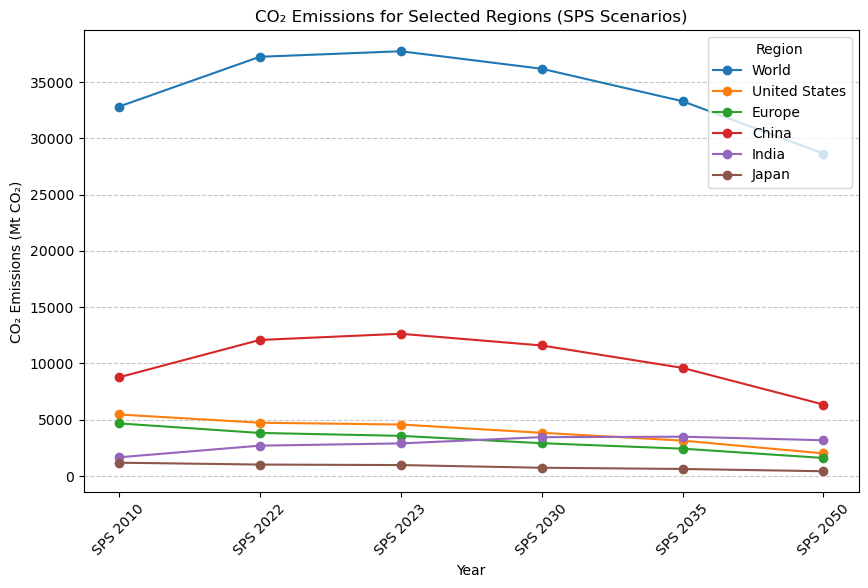

In [3897]:
# Define regions 
regions_of_interest = ["World", "United States", "China", "Europe", "Japan", "India"]

# Strip spaces from column names and region names
Total_CO2_emissions_filtered.columns = Total_CO2_emissions_filtered.columns.str.strip()
Total_CO2_emissions_filtered["Region"] = Total_CO2_emissions_filtered["Region"].astype(str).str.strip()

# Define numerical SPS columns
sps_cols = ["SPS 2010", "SPS 2022", "SPS 2023", "SPS 2030", "SPS 2035", "SPS 2050"]

# Clean numeric columns 
for col in sps_cols:
    if col in Total_CO2_emissions_filtered.columns:
        Total_CO2_emissions_filtered[col] = (
            Total_CO2_emissions_filtered[col]
            .astype(str)
            .str.replace(" ", "")
            .str.replace(",", "")
        )
        Total_CO2_emissions_filtered[col] = pd.to_numeric(Total_CO2_emissions_filtered[col], errors="coerce")

# Filter dataset for the selected regions
filtered_data = Total_CO2_emissions_filtered[Total_CO2_emissions_filtered["Region"].isin(regions_of_interest)]

# Set "Region" as the index
filtered_data.set_index("Region", inplace=True)

# Select only the SPS columns for plotting
sps_data = filtered_data[sps_cols]

# Transpose the data so that SPS years are on the x-axis
sps_data_T = sps_data.T  

# Plot the line graph
plt.figure(figsize=(10, 6))
for region in sps_data_T.columns:
    plt.plot(sps_data_T.index, sps_data_T[region], marker="o", label=region)

# Customizing the plot
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Mt CO₂)")
plt.title("CO₂ Emissions for Selected Regions (SPS Scenarios)")
plt.xticks(rotation=45)
plt.legend(loc="upper right", title="Region")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/2704328894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_CO2_emissions_filtered["Region"] = Total_CO2_emissions_filtered["Region"].astype(str).str.strip()
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/2704328894.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_CO2_emissions_filtered[col] = (
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/2704328894.py:18: SettingWithCopyWarning: 
A value 

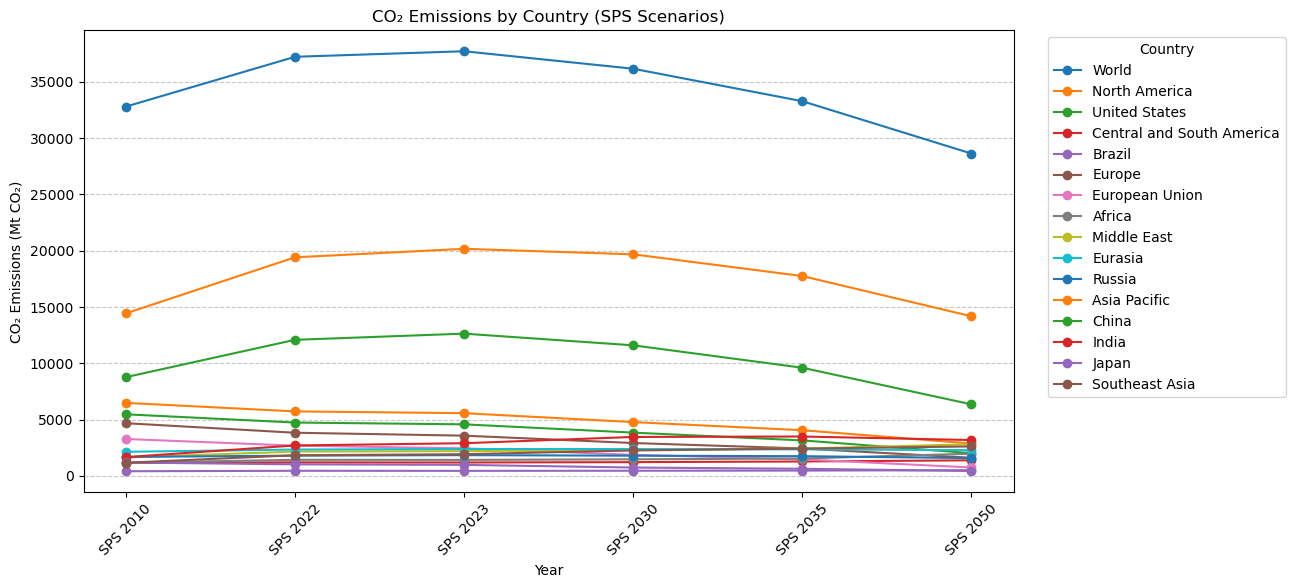

In [3898]:
# Strip spaces from column names and region names
Total_CO2_emissions_filtered.columns = Total_CO2_emissions_filtered.columns.str.strip()
if "Region" in Total_CO2_emissions_filtered.columns:
    Total_CO2_emissions_filtered["Region"] = Total_CO2_emissions_filtered["Region"].astype(str).str.strip()

# Define numerical SPS columns (only SPS years)
sps_cols = ["SPS 2010", "SPS 2022", "SPS 2023", "SPS 2030", "SPS 2035", "SPS 2050"]

# Clean numeric columns (remove spaces, commas, convert to numbers)
for col in sps_cols:
    if col in Total_CO2_emissions_filtered.columns:
        Total_CO2_emissions_filtered[col] = (
            Total_CO2_emissions_filtered[col]
            .astype(str)
            .str.replace(" ", "")
            .str.replace(",", "")
        )
        Total_CO2_emissions_filtered[col] = pd.to_numeric(Total_CO2_emissions_filtered[col], errors="coerce")

# Drop rows where "Region" or any SPS column is NaN
Total_CO2_emissions_filtered = Total_CO2_emissions_filtered.dropna(subset=["Region"] + sps_cols)

# Set "Region" as the index
Total_CO2_emissions_filtered.set_index("Region", inplace=True)

# Select only the SPS columns for plotting
sps_data = Total_CO2_emissions_filtered[sps_cols]

# Transpose the data so that SPS years are on the x-axis
sps_data_T = sps_data.T  

# Plot the line graph
plt.figure(figsize=(12, 6))
for country in sps_data_T.columns:
    plt.plot(sps_data_T.index, sps_data_T[country], marker="o", label=country)

# Customizing the plot
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Mt CO₂)")
plt.title("CO₂ Emissions by Country (SPS Scenarios)")
plt.xticks(rotation=45)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1), title="Country")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [3899]:
print("Column names in dataset:")
print(Total_CO2_emissions_filtered.columns.tolist())  


Column names in dataset:
['Flow', 'Unit', 'SPS 2010', 'SPS 2022', 'SPS 2023', 'SPS 2030', 'SPS 2035', 'SPS 2050', 'APS 2030', 'APS 2035', 'APS 2050']


In [3900]:
print(Total_CO2_emissions_filtered.head())


                                          Flow    Unit  SPS 2010  SPS 2022  \
Region                                                                       
World                      Total energy supply  Mt CO2     32805     37230   
North America              Total energy supply  Mt CO2      6485      5728   
United States              Total energy supply  Mt CO2      5470      4738   
Central and South America  Total energy supply  Mt CO2      1149      1200   
Brazil                     Total energy supply  Mt CO2       412       452   

                           SPS 2023  SPS 2030  SPS 2035  SPS 2050  APS 2030  \
Region                                                                        
World                         37723     36170     33285     28636     32056   
North America                  5571      4778      4056      2878      3837   
United States                  4579      3843      3152      2016      3086   
Central and South America      1189      1221      1278   

In [3901]:
# Strip any leading/trailing spaces from column names
Total_CO2_emissions_filtered.columns = Total_CO2_emissions_filtered.columns.str.strip()

# List of numerical columns to clean
numeric_cols = ["SPS 2010", "SPS 2022", "SPS 2023", "SPS 2030", "SPS 2035", "SPS 2050", "APS 2030", "APS 2035", "APS 2050"]

# Clean numeric columns 
for col in numeric_cols:
    Total_CO2_emissions_filtered.loc[:, col] = (
        Total_CO2_emissions_filtered[col]
        .astype(str)  
        .str.replace(" ", "")  
        .str.replace(",", "")  
    )
    Total_CO2_emissions_filtered.loc[:, col] = pd.to_numeric(Total_CO2_emissions_filtered[col], errors="coerce")

# Drop rows where "Region" or "SPS 2023" is NaN
Total_CO2_emissions_filtered = Total_CO2_emissions_filtered.dropna(subset=["Region", "SPS 2023"])

# Set "Region" as the index
Total_CO2_emissions_filtered.set_index("Region", inplace=True)

# Plot the bar chart for "SPS 2023"
plt.figure(figsize=(12, 6))
Total_CO2_emissions_filtered["SPS 2023"].plot(kind="bar", color="salmon")

# Customizing the plot
plt.xlabel("Region")
plt.ylabel("CO₂ Emissions (Mt CO₂)")
plt.title("Total CO₂ Emissions per Region (SPS 2023)")
plt.xticks(rotation=45, ha="right")  
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/2264283065.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['32805' '6485' '5470' '1149' '412' '4679' '3277' '1161' '1639' '2141'
 '1684' '14436' '8770' '1667' '1189' '1165']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Total_CO2_emissions_filtered.loc[:, col] = (
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/2264283065.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['37230' '5728' '4738' '1200' '452' '3832' '2682' '1428' '2158' '2339'
 '1798' '19417' '12087' '2702' '1024' '1833']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Total_CO2_emissions_filtered.loc[:, col] = (
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_7384/2264283065.py:9: FutureWarning: Set

KeyError: ['Region']

In [ ]:
# Strip any leading/trailing spaces from column names
Total_CO2_emissions_filtered.columns = Total_CO2_emissions_filtered.columns.str.strip()

# Check the first few rows of the data to inspect format
print(Total_CO2_emissions_filtered.head())

# List of numerical columns to clean
numeric_cols = ["SPS 2010", "SPS 2022", "SPS 2023", "SPS 2030", "SPS 2035", "SPS 2050", "APS 2030", "APS 2035", "APS 2050"]

# Remove spaces within numbers and convert to numeric
for col in numeric_cols:
    Total_CO2_emissions_filtered.loc[:, col] = (
        Total_CO2_emissions_filtered[col]
        .astype(str)  
        .str.replace(" ", "") 
        .str.replace(",", "")  
    )
    # Convert to numeric 
    Total_CO2_emissions_filtered.loc[:, col] = pd.to_numeric(Total_CO2_emissions_filtered[col], errors="coerce")

# Drop rows where "Region" or "SPS 2010" is NaN
Total_CO2_emissions_filtered = Total_CO2_emissions_filtered.dropna(subset=["Region", "SPS 2010"])

# Set "Region" as the index
Total_CO2_emissions_filtered.set_index("Region", inplace=True)

# Plot the bar chart for "SPS 2010"
plt.figure(figsize=(12, 6))
Total_CO2_emissions_filtered["SPS 2010"].plot(kind="bar", color="skyblue")

# Customizing the plot
plt.xlabel("Region")
plt.ylabel("CO₂ Emissions (Mt CO₂)")
plt.title("Total CO₂ Emissions per Region (SPS 2010)")
plt.xticks(rotation=45, ha="right") 
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


                                          Flow    Unit SPS 2010 SPS 2022  \
Region                                                                     
World                      Total energy supply  Mt CO2    32805    37230   
North America              Total energy supply  Mt CO2     6485     5728   
United States              Total energy supply  Mt CO2     5470     4738   
Central and South America  Total energy supply  Mt CO2     1149     1200   
Brazil                     Total energy supply  Mt CO2      412      452   

                          SPS 2023 SPS 2030 SPS 2035 SPS 2050 APS 2030  \
Region                                                                   
World                        37723    36170    33285    28636    32056   
North America                 5571     4778     4056     2878     3837   
United States                 4579     3843     3152     2016     3086   
Central and South America     1189     1221     1278     1384     1078   
Brazil                 

KeyError: ['Region']

In [ ]:
# Strip any leading/trailing spaces from column names
Total_CO2_emissions_filtered.columns = Total_CO2_emissions_filtered.columns.str.strip()

# List of numerical columns to clean
numeric_cols = ["SPS 2010", "SPS 2022", "SPS 2023", "SPS 2030", "SPS 2035", "SPS 2050", "APS 2030", "APS 2035", "APS 2050"]

# Clean numeric columns 
for col in numeric_cols:
    Total_CO2_emissions_filtered.loc[:, col] = (
        Total_CO2_emissions_filtered[col]
        .astype(str)  
        .str.replace(" ", "")  
        .str.replace(",", "")  
    )
    Total_CO2_emissions_filtered.loc[:, col] = pd.to_numeric(Total_CO2_emissions_filtered[col], errors="coerce")

# Drop rows where "Region" or "SPS 2023" is NaN
Total_CO2_emissions_filtered = Total_CO2_emissions_filtered.dropna(subset=[" Region ", "SPS 2023"])

# Set "Region" as the index
Total_CO2_emissions_filtered.set_index("Region", inplace=True)

# Plot the bar chart for "SPS 2023"
plt.figure(figsize=(12, 6))
Total_CO2_emissions_filtered["SPS 2023"].plot(kind="bar", color="salmon")

# Customizing the plot
plt.xlabel("Region")
plt.ylabel("CO₂ Emissions (Mt CO₂)")
plt.title("Total CO₂ Emissions per Region (SPS 2023)")
plt.xticks(rotation=45, ha="right")  
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


KeyError: [' Region ']

In [ ]:
# output_file_path = "Total_CO2_emissions_filtered.csv"
# Total_CO2_emissions_filtered.to_csv(output_file_path, index=True)



In [ ]:
Solar_wind_generation_exp = "Solar and Wind Generation.csv"
Solar_wind_generation.to_csv(Solar_wind_generation_exp, index=True)

In [ ]:
# List of your DataFrames
dataframes = [
    ("Electricity_demands_by_region_cleaned", Electricity_demands_by_region_cleaned),
    ("Electricity_generation_by_region_cleaned", Electricity_generation_by_region_cleaned),
    ("Renewable_energy_buildings_consumption_cleaned", Renewable_energy_buildings_consumption_cleaned),
    ("Renewable_energy_transport_consumption_cleaned", Renewable_energy_transport_consumption_cleaned),
    ("Renewable_energy_industries_consumption_cleaned", Renewable_energy_industries_consumption_cleaned),
    ("Renewable_energy_supply_cleaned", Renewable_energy_supply_cleaned),
    ("Renewable_energy_generation_cleaned", Renewable_energy_generation_cleaned),
    ("Solar_energy_generation_cleaned", Solar_energy_generation_cleaned),
    ("Wind_energy_generation_cleaned", Wind_energy_generation_cleaned),
    ("Total_CO2_emissions_cleaned", Total_CO2_emissions_cleaned),
    ("Total_energy_supply_cleaned", Total_energy_supply_cleaned),
    ("Total_energy_consumption_cleaned", Total_energy_consumption_cleaned)
]

# Loop through each DataFrame and save it to a CSV file
for name, df in dataframes:
    output_file_path = f"{name}.csv"  
    df.to_csv(output_file_path, index=False)  
    print(f"Data from {name} saved to {output_file_path}")


Data from Electricity_demands_by_region_cleaned saved to Electricity_demands_by_region_cleaned.csv
Data from Electricity_generation_by_region_cleaned saved to Electricity_generation_by_region_cleaned.csv
Data from Renewable_energy_buildings_consumption_cleaned saved to Renewable_energy_buildings_consumption_cleaned.csv
Data from Renewable_energy_transport_consumption_cleaned saved to Renewable_energy_transport_consumption_cleaned.csv
Data from Renewable_energy_industries_consumption_cleaned saved to Renewable_energy_industries_consumption_cleaned.csv
Data from Renewable_energy_supply_cleaned saved to Renewable_energy_supply_cleaned.csv
Data from Renewable_energy_generation_cleaned saved to Renewable_energy_generation_cleaned.csv
Data from Solar_energy_generation_cleaned saved to Solar_energy_generation_cleaned.csv
Data from Wind_energy_generation_cleaned saved to Wind_energy_generation_cleaned.csv
Data from Total_CO2_emissions_cleaned saved to Total_CO2_emissions_cleaned.csv
Data from 

In [ ]:
Solar_energy_generation_cleaned1 = Solar_energy_generation_cleaned

rename_dict1 = {
    "Stated Policies Scenario": "SPS 2010",
    "Stated Policies Scenario.1": "SPS 2022",
    "Stated Policies Scenario.2": "SPS 2023",
    "Stated Policies Scenario.3": "SPS 2030",
    "Stated Policies Scenario.4": "SPS 2035",
    "Stated Policies Scenario.5": "SPS 2050",
    "Announced Pledges Scenario": "APS 2030",
    "Announced Pledges Scenario.1": "APS 2035",
    "Announced Pledges Scenario.2": "APS 2050",
}

Solar_energy_generation_cleaned1 = Solar_energy_generation_cleaned1.rename(
    columns=rename_dict1
)
Solar_energy_generation_cleaned1 = Solar_energy_generation_cleaned1.drop(0)

Solar_energy_generation_cleaned1.to_csv("Solar_energy_generation_cleaned1.csv", index=True)
#Wind_energy_generation_cleaned 

In [ ]:
Wind_energy_generation_cleaned1 = Wind_energy_generation_cleaned  
rename_dict2 = {
    "Stated Policies Scenario": "SPS 2010",
    "Stated Policies Scenario.1": "SPS 2022",
    "Stated Policies Scenario.2": "SPS 2023",
    "Stated Policies Scenario.3": "SPS 2030",
    "Stated Policies Scenario.4": "SPS 2035",
    "Stated Policies Scenario.5": "SPS 2050",
    "Announced Pledges Scenario": "APS 2030",
    "Announced Pledges Scenario.1": "APS 2035",
    "Announced Pledges Scenario.2": "APS 2050",
}

Wind_energy_generation_cleaned1 = Wind_energy_generation_cleaned1.rename(
    columns=rename_dict2
)
Wind_energy_generation_cleaned1 = Wind_energy_generation_cleaned1.drop(0)

Wind_energy_generation_cleaned1.to_csv("Wind_energy_generation_cleaned1.csv", index=False)
#Wind_energy_generation_cleaned 